In [40]:
from collections import defaultdict
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
import random
%matplotlib inline

In [41]:
#load various results from csv files and convert them to pandas dataframes
best = pd.read_excel("LIWC2015 Results (best_sellers (105 files)).xlsx").fillna(value=0)
blue = pd.read_excel("LIWC2015 Results (blue_050117 (69 files)).xlsx").fillna(value=0)
pink = pd.read_excel("LIWC2015 Results (pink_9_22_16 (88 files)).xlsx").fillna(value=0)
alger = pd.read_excel("LIWC2015 Results (alger_050117 (48 files)).xlsx").fillna(value=0)

In [43]:
#look at first ten rows of bestseller data
best.iloc[:10]

Filename  Segment     WC  \
0  best_sellers_Abbott_Jacob_Rollo_on_the_At_2225...        1  46896   
1  best_sellers_Allen_James_La_A_Kentucky_Card_11...        1  21234   
2  best_sellers_Allen_James_La_Aftermath_Part_135...        1  21547   
3  best_sellers_Allen_James_La_The_Choir_Invis_23...        1  69852   
4  best_sellers_Allen_James_La_The_Reign_of_La_37...        1  65332   
5  best_sellers_Bacheller_Irvi_D_Ri_and_I_A_T_124...        1  66867   
6  best_sellers_Bacheller_Irvi_Eben_Holden_A_2799...        1  90119   
7  best_sellers_Bangs_John_Ken_A_House_Boat_on_26...        1  27610   
8  best_sellers_Bangs_John_Ken_The_Pursuit_of_160...        1  33415   
9    best_sellers_Barrie_J_M_Margaret_Ogilvy_342.txt        1  31572   

   Analytic  Clout  Authentic   Tone    WPS  Sixltr    Dic   ...    Comma  \
0     81.32  75.25      27.64  46.94  18.62   14.15  85.07   ...     8.88   
1     68.61  61.73      46.10  40.23  17.45   14.21  86.04   ...     6.27   
2     76.18  63.15      45.30  48.04  19.73   15.51  85.52   ...     5.39   
3     78.29  81.28      13.71  39.46  21.42   15.52  85.78   ...     5.28   
4     84.62  76.38      20.54  35.84  19.64   16.40  86.10   ...     6.34   
5     77.54  72.52      43.38  43.60  13.25   11.23  82.53   ...     7.64   
6     78.35  77.91      35.40  48.55  14.50   11.41  83.59   ...     5.48   
7     66.48  69.49      24.08  41.42  15.44   16.48  84.81   ...     8.08   
8     68.83  72.12      22.70  46.62  17.05   17.58  82.91   ...     8.20   
9     38.27  69.63      31.78  45.92  22.89   11.48  90.25   ...     7.07   

   Colon  SemiC  QMark  Exclam  Dash  Quote  Apostro  Parenth  OtherP  
0   0.06   0.63   0.28    0.23  0.86   3.32     0.60     0.00    0.48  
1   0.17   0.67   0.71    0.63  2.12   2.19     0.81     0.00    0.99  
2   0.19   0.93   0.41    0.56  2.16   2.64     0.75     0.01    0.40  
3   0.52   1.12   0.42    0.55  2.41   2.28     0.83     0.01    0.01  
4   0.55   0.98   0.40    0.51  2.57   2.02     0.64     0.10    0.02  
5   0.12   0.38   0.36    0.53  2.16   4.55     3.72     0.01    0.28  
6   0.06   0.16   0.35    0.40  1.42   0.31     8.66     0.01    0.01  
7   0.08   0.43   0.75    0.29  1.90   6.96     2.97     0.00    0.55  
8   0.13   0.49   0.56    0.41  2.36   5.97     2.82     0.03    0.65  
9   0.12   0.43   0.52    0.37  1.44   0.08     4.34     0.54    0.11  

[10 rows x 95 columns]

In [44]:
#look at first ten rows of alger data
alger.iloc[:10]

Filename  Segment     WC  \
0  Alger_Horatio_Ben_s_Nugget_Or_A_Boy_s_Search_F...        1  43327   
1  Alger_Horatio_Ben_the_Luggage_Boy_Or_Among_the...        1  52124   
2  Alger_Horatio_Bob_Burton_IA_bobburtonyoungra00...        1  61033   
3  Alger_Horatio_Bound_to_Rise_Or_Up_the_Ladder_P...        1  46946   
4           Alger_Horatio_Brave_and_Bold_PG_9990.txt        1  58675   
5  Alger_Horatio_Charlie_Codmans_cruise_IA_charli...        1  55362   
6  Alger_Horatio_Dan_the_newsboy_IA_dannewsboyalg...        1  60723   
7  Alger_Horatio_Fame_and_Fortune_or_The_Progress...        1  44458   
8  Alger_Horatio_Frank_Fowler_the_cash_boy_IA_fra...        1  61985   
9  Alger_Horatio_Frank_Hunters_peril_IA_frankhunt...        1  52279   

   Analytic  Clout  Authentic   Tone    WPS  Sixltr    Dic   ...    Comma  \
0     49.61  82.54      11.10  49.07  12.12   16.08  84.46   ...     8.19   
1     63.76  78.75      13.93  57.48  11.98   14.79  86.07   ...     7.95   
2     65.75  79.45      11.58  56.17  10.51   15.31  82.46   ...     8.50   
3     45.87  74.48      22.35  64.81  10.63   12.82  88.92   ...     7.82   
4     56.49  79.02      14.27  53.69  12.93   16.09  86.62   ...     8.26   
5     57.51  77.86      11.62  42.42  13.43   16.17  85.39   ...     8.25   
6     61.33  84.86      11.63  61.44  10.42   14.81  84.28   ...     8.28   
7     47.55  76.38      17.55  71.76  11.41   16.01  87.48   ...     8.48   
8     46.84  82.32      17.24  57.22  13.02   13.60  86.51   ...     6.69   
9     39.98  78.38      13.76  50.47  11.66   14.70  85.36   ...     8.69   

   Colon  SemiC  QMark  Exclam  Dash  Quote  Apostro  Parenth  OtherP  
0   0.08   0.29   1.09    0.28  1.07   8.57     3.07     0.02    0.02  
1   0.03   0.59   0.90    0.09  1.00   7.06     2.76     0.03    0.67  
2   0.15   0.45   1.12    0.28  0.38   8.20     2.53     0.01    0.26  
3   0.08   0.50   1.31    0.20  0.73  10.66     3.78     0.00    0.00  
4   0.07   0.24   0.88    0.27  0.66   7.51     1.99     0.07    0.19  
5   0.13   0.35   0.90    0.34  0.41   6.47     2.35     0.02    0.42  
6   0.12   0.31   1.17    0.33  0.75   8.20     4.53     0.03    1.39  
7   0.01   0.47   1.26    0.19  1.12  10.17     3.51     0.01    0.13  
8   0.11   0.25   1.11    0.24  0.59   4.74     6.16     0.03    6.07  
9   0.09   0.34   1.21    0.20  0.46   7.95     4.01     0.08    2.04  

[10 rows x 95 columns]

In [45]:
#function to calculate mann-whitney scores for each column, in this case comparing bestsellers to alger novels
def calc_mannwhitney(best, alger):
    stats = defaultdict(lambda: defaultdict(int))
    pvals = defaultdict(lambda: defaultdict(float))
    rho = defaultdict(lambda: defaultdict(float))
    n_alger = alger.shape[0]
    n_best = best.shape[0]
    
    for col in best.columns[2:]:         
        stat, pval =  mannwhitneyu(alger[col], best[col], alternative="two-sided")
        stats['algerbest_stat'][col] = stat
        pvals['algerbest_pval'][col] = pval / 2
        rho['algerbest_rho'][col] = stat / (n_alger * n_best)
    pvals = pd.DataFrame(pvals)
    stats = pd.DataFrame(stats)
    rho = pd.DataFrame(rho)
    mwu = pvals.merge(stats, left_index=True, right_index=True)
    mwu = mwu.merge(rho, left_index=True, right_index=True)
    return mwu

In [46]:
#run the mann whitney function and view the result ordered by the columns where alger's m-w score is the highest
mwu = calc_mannwhitney(best, alger)
mwu.sort_values(by="algerbest_stat", ascending=False)

algerbest_pval  algerbest_stat  algerbest_rho
focusfuture     3.335261e-23          5026.0       0.997222
reward          4.265690e-23          5019.5       0.995933
money           8.271821e-23          5002.5       0.992560
Quote           4.067729e-22          4961.5       0.984425
Period          4.305827e-22          4960.0       0.984127
focuspresent    9.022974e-22          4940.5       0.980258
you             1.526175e-21          4926.5       0.977480
auxverb         2.227486e-21          4916.5       0.975496
QMark           4.475908e-21          4897.5       0.971726
verb            1.322428e-20          4868.5       0.965972
AllPunc         6.559145e-20          4824.5       0.957242
assent          5.542044e-18          4696.0       0.931746
work            1.221479e-17          4674.5       0.927480
Tone            1.367030e-16          4602.0       0.913095
number          7.477709e-16          4549.0       0.902579
discrep         1.346495e-15          4530.5       0.898909
achieve         1.827375e-15          4520.5       0.896925
negate          1.000538e-14          4466.0       0.886111
tentat          2.567156e-14          4435.0       0.879960
insight         8.456426e-14          4395.0       0.872024
posemo          2.373170e-11          4193.5       0.832044
cogproc         2.000443e-10          4111.0       0.815675
informal        6.527793e-10          4063.0       0.806151
cause           9.160618e-10          4049.0       0.803373
male            5.601495e-09          3973.0       0.788294
i               1.281651e-07          3831.0       0.760119
ppron           1.681505e-07          3818.0       0.757540
pronoun         3.553847e-07          3781.5       0.750298
social          4.766026e-06          3646.5       0.723512
hear            1.000211e-05          3605.0       0.715278
...                      ...             ...            ...
SemiC           1.323203e-05          1451.0       0.287897
compare         1.073090e-05          1439.0       0.285516
health          3.064089e-06          1370.0       0.271825
motion          4.246024e-07          1267.5       0.251488
time            5.763192e-08          1171.5       0.232440
sexual          4.809339e-08          1168.0       0.231746
power           5.171587e-08          1166.5       0.231448
percept         7.378734e-09          1079.0       0.214087
certain         2.056891e-09          1024.5       0.203274
negemo          6.819440e-10           978.5       0.194147
Exclam          6.041931e-10           974.0       0.193254
feel            4.142705e-11           868.0       0.172222
WC              4.077279e-12           781.0       0.154960
anger           5.587050e-13           710.5       0.140972
space           2.358837e-13           680.0       0.134921
relativ         1.617541e-13           667.0       0.132341
Analytic        7.010881e-14           638.5       0.126687
female          6.792413e-14           637.5       0.126488
death           2.764538e-14           608.5       0.120734
article         1.962398e-14           596.0       0.118254
they            7.465826e-15           564.5       0.112004
prep            1.858876e-16           447.5       0.088790
sad             1.156340e-16           433.5       0.086012
see             1.030320e-16           429.5       0.085218
conj            2.889870e-17           391.0       0.077579
body            2.206175e-17           383.0       0.075992
bio             1.776569e-17           376.5       0.074702
Dash            6.028429e-18           344.5       0.068353
WPS             3.881833e-20           201.0       0.039881
relig           3.531976e-20           199.0       0.039484

[93 rows x 3 columns]

In [50]:
# function to generate a kernel density estimate for each column in the best and alger dataframes
# for more on kernel density estimates, see https://mathisonian.github.io/kde/
def plotter(fieldname, alpha=.80, bw = "scott"):
    fig = plt.figure(figsize=(20,4))
    n = sns.kdeplot(np.array(sorted(best[fieldname])), bw=bw, color='purple', alpha=alpha, 
                       label="best")
    n = sns.kdeplot(np.array(sorted(alger[fieldname])), bw=bw, color='red', alpha=alpha, 
                       label="alger")
    plt.title(fieldname)
    return fig

/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


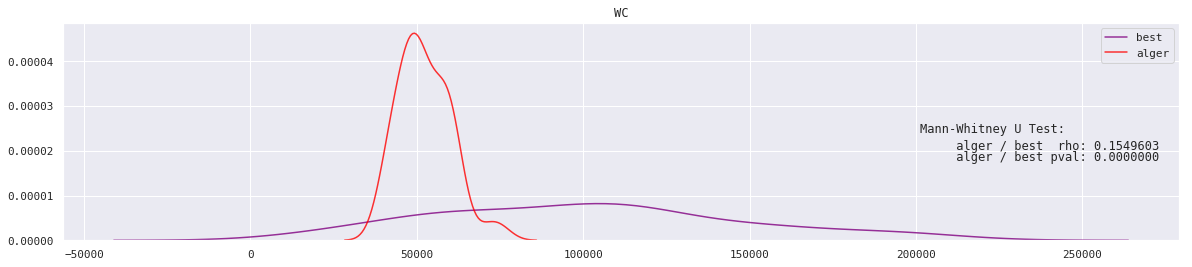

<Figure size 432x288 with 0 Axes>

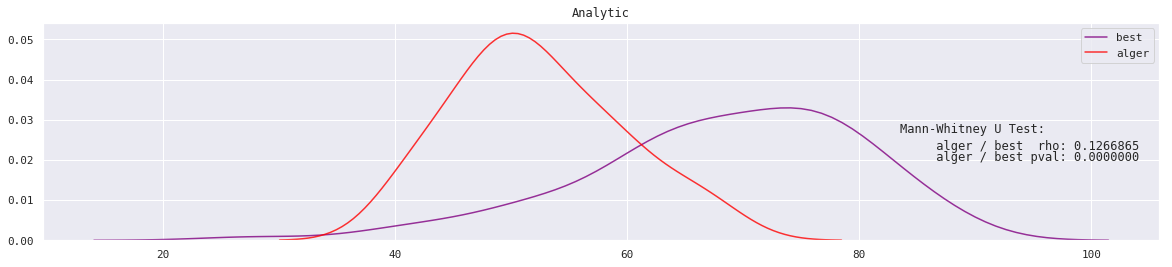

<Figure size 432x288 with 0 Axes>

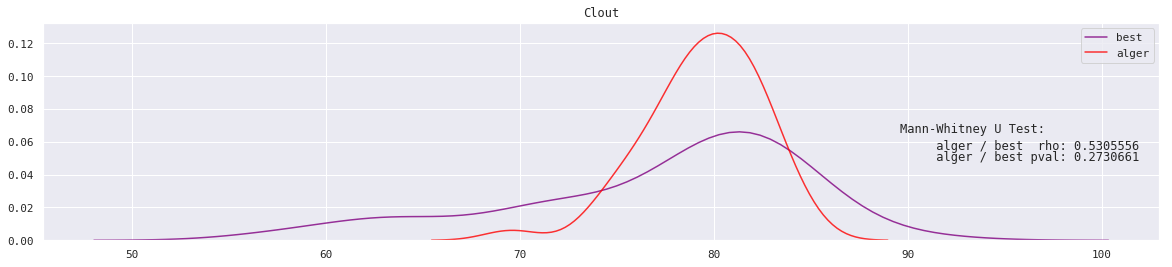

<Figure size 432x288 with 0 Axes>

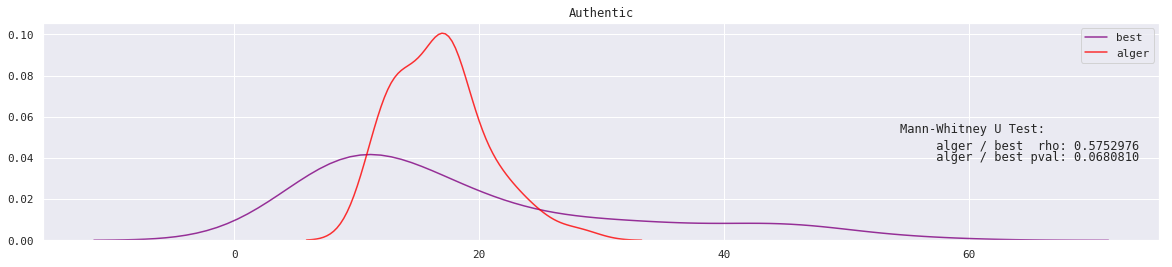

<Figure size 432x288 with 0 Axes>

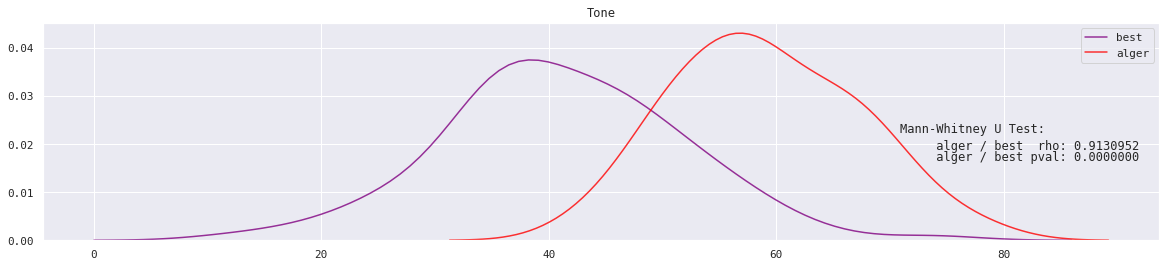

<Figure size 432x288 with 0 Axes>

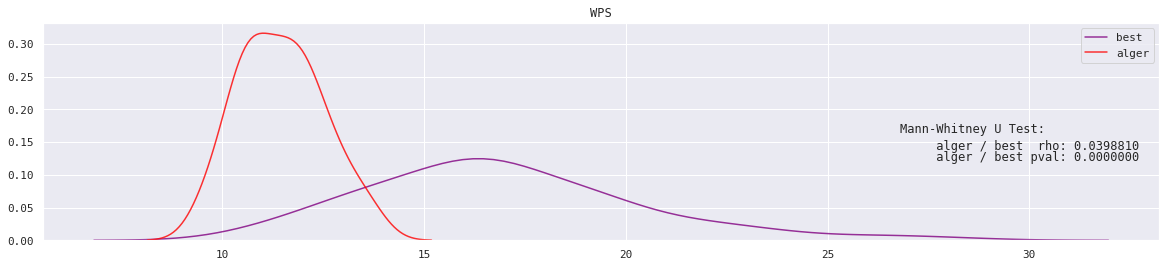

<Figure size 432x288 with 0 Axes>

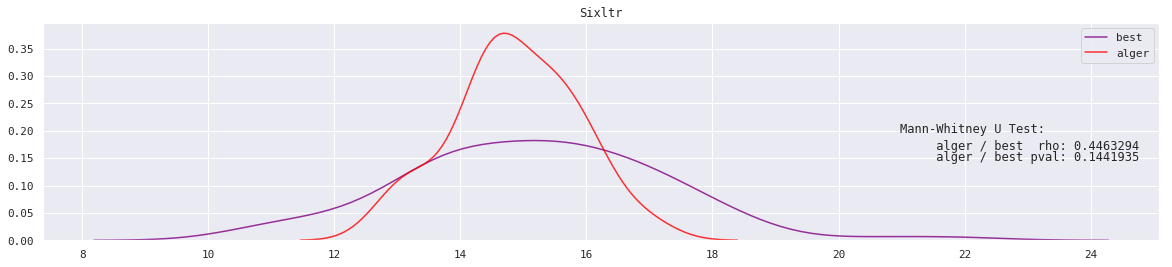

<Figure size 432x288 with 0 Axes>

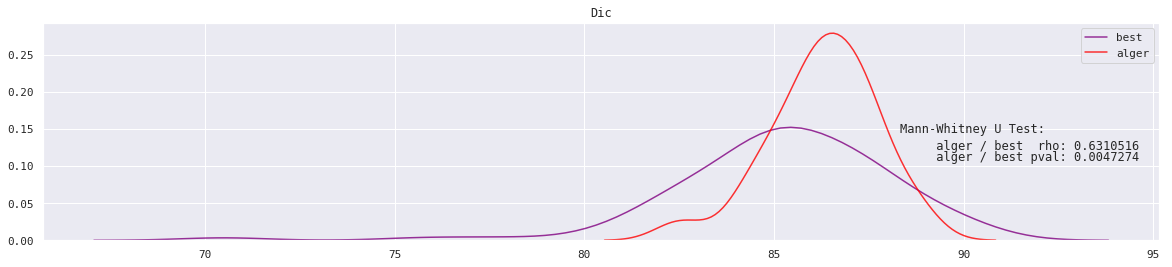

<Figure size 432x288 with 0 Axes>

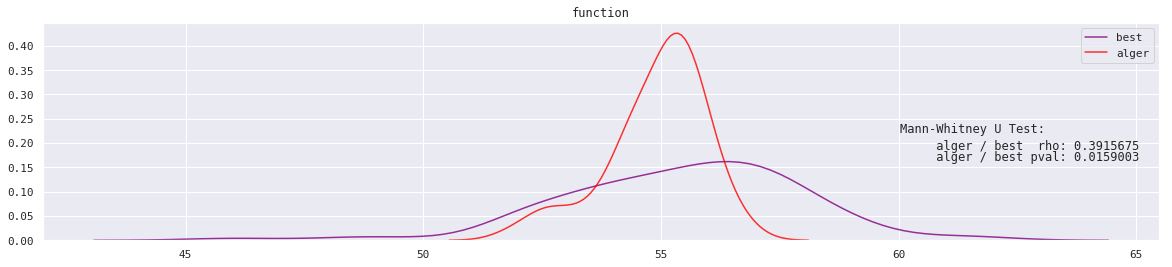

<Figure size 432x288 with 0 Axes>

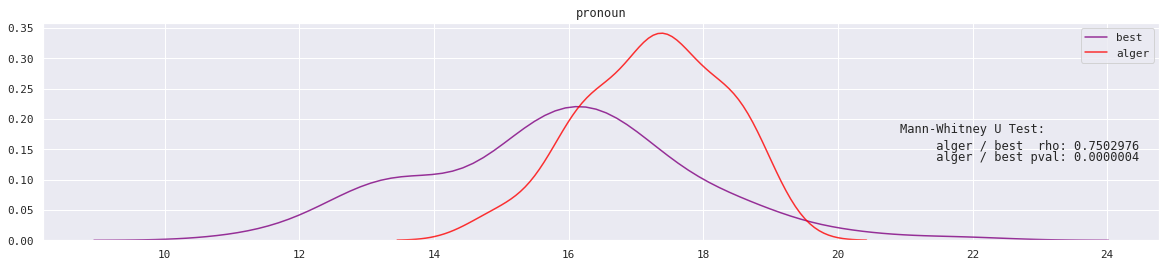

<Figure size 432x288 with 0 Axes>

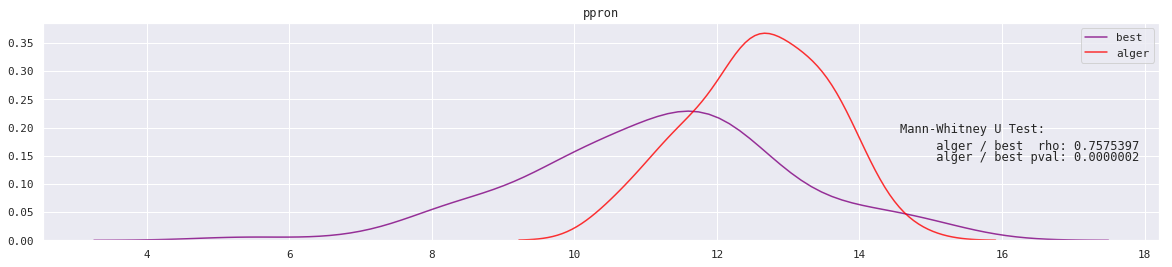

<Figure size 432x288 with 0 Axes>

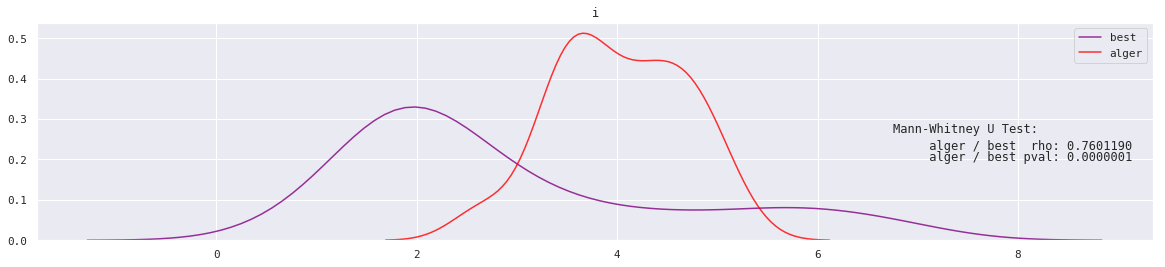

<Figure size 432x288 with 0 Axes>

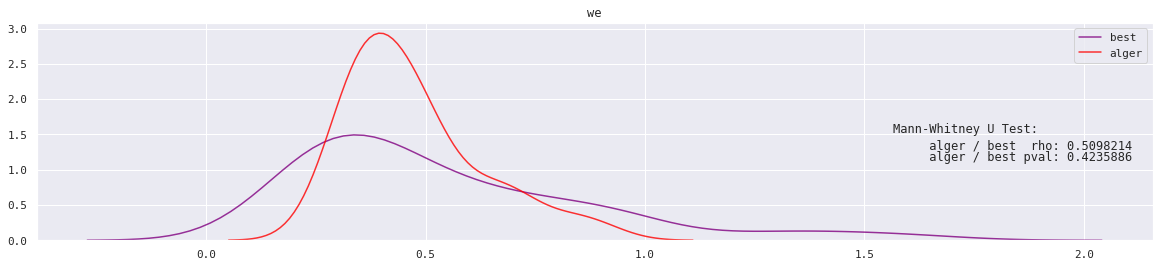

<Figure size 432x288 with 0 Axes>

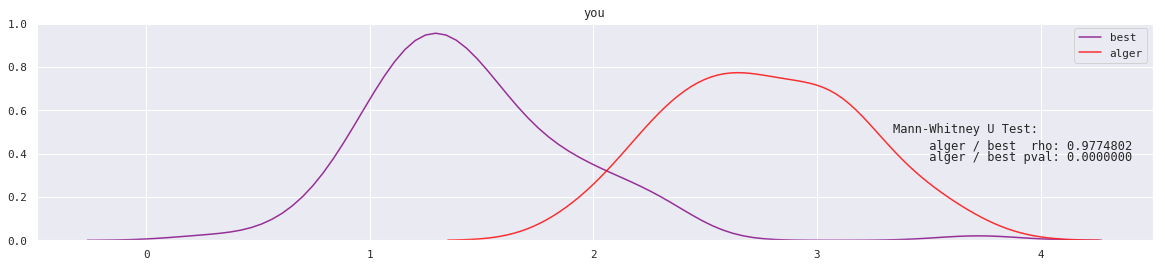

<Figure size 432x288 with 0 Axes>

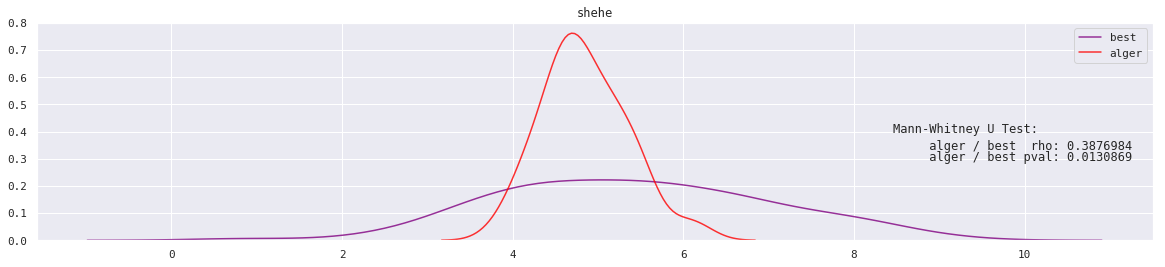

<Figure size 432x288 with 0 Axes>

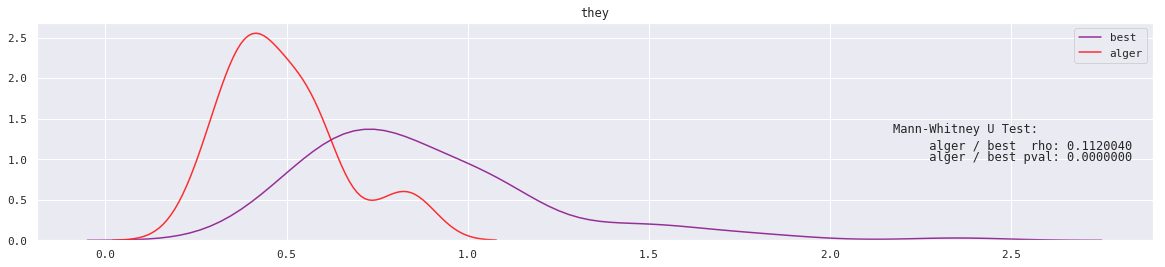

<Figure size 432x288 with 0 Axes>

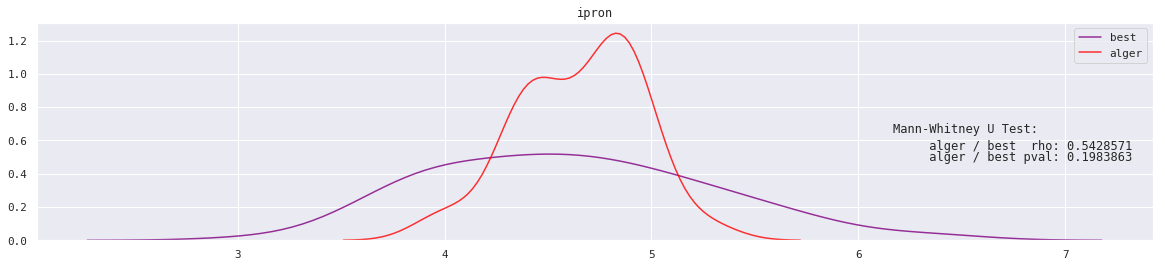

<Figure size 432x288 with 0 Axes>

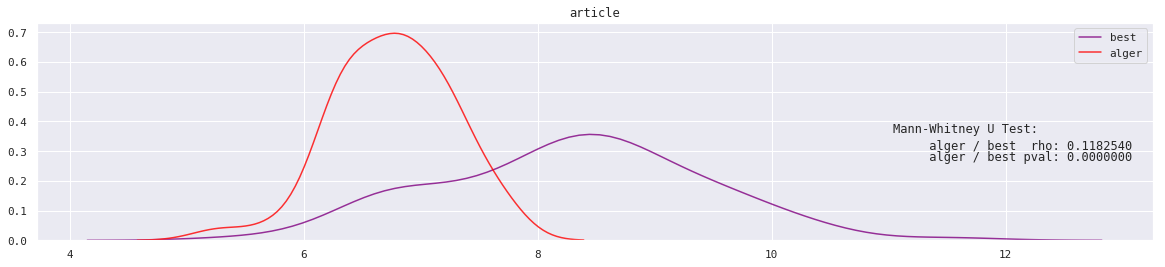

<Figure size 432x288 with 0 Axes>

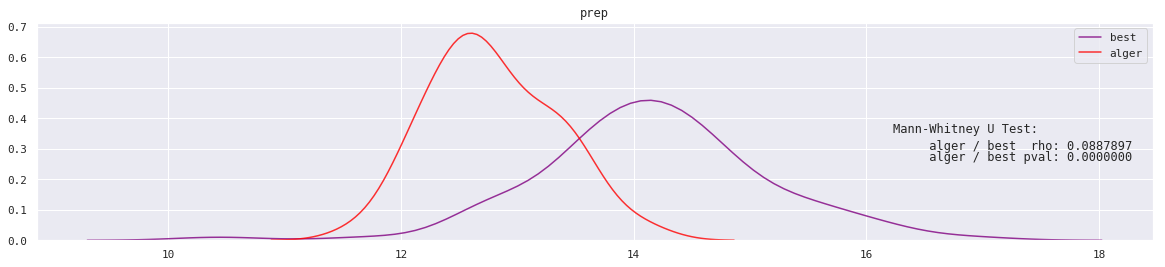

<Figure size 432x288 with 0 Axes>

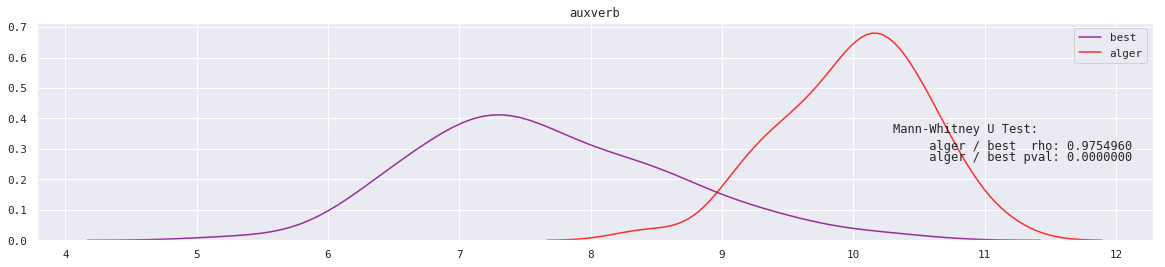

<Figure size 432x288 with 0 Axes>

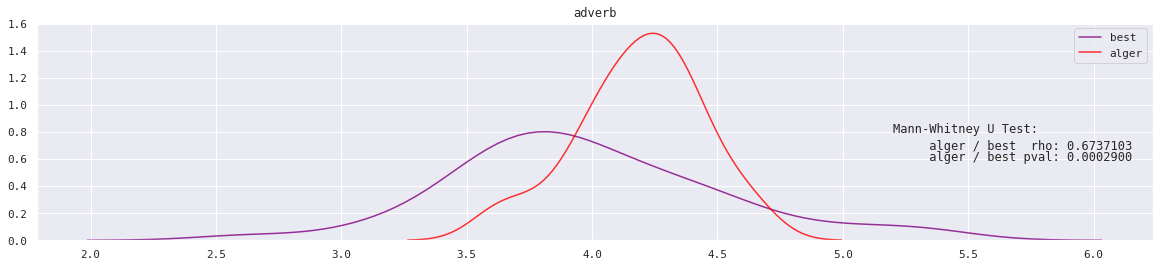

<Figure size 432x288 with 0 Axes>

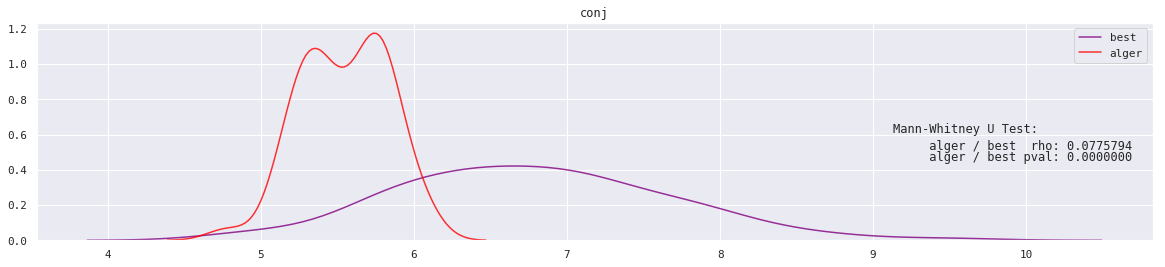

<Figure size 432x288 with 0 Axes>

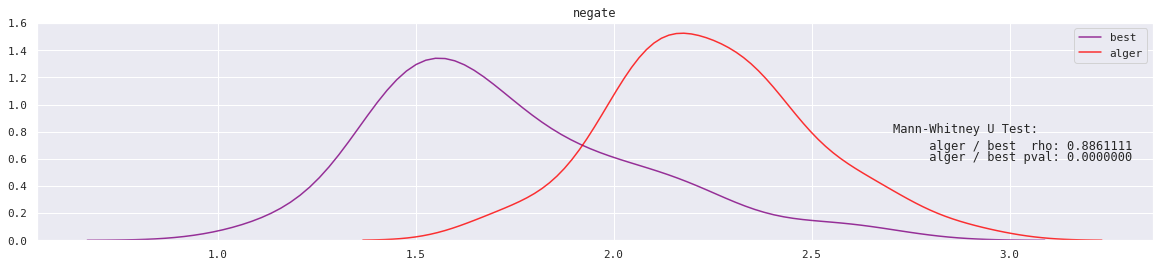

<Figure size 432x288 with 0 Axes>

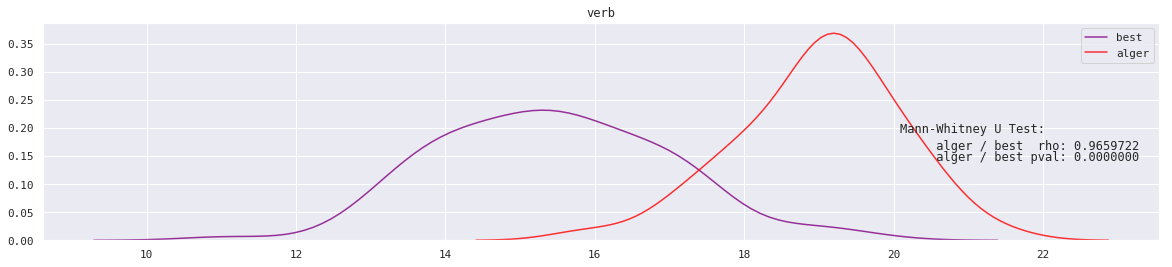

<Figure size 432x288 with 0 Axes>

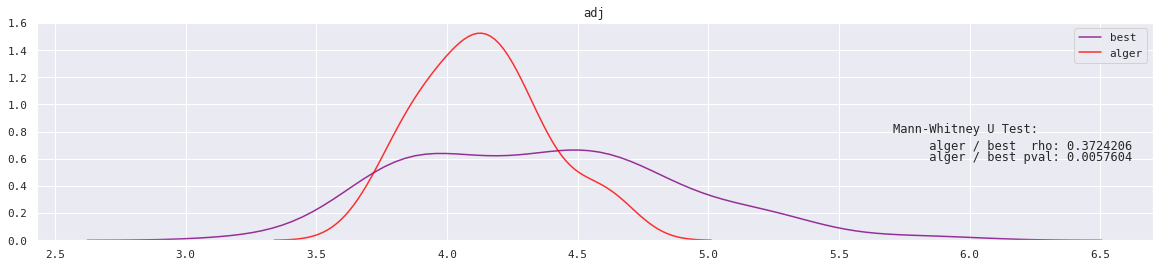

<Figure size 432x288 with 0 Axes>

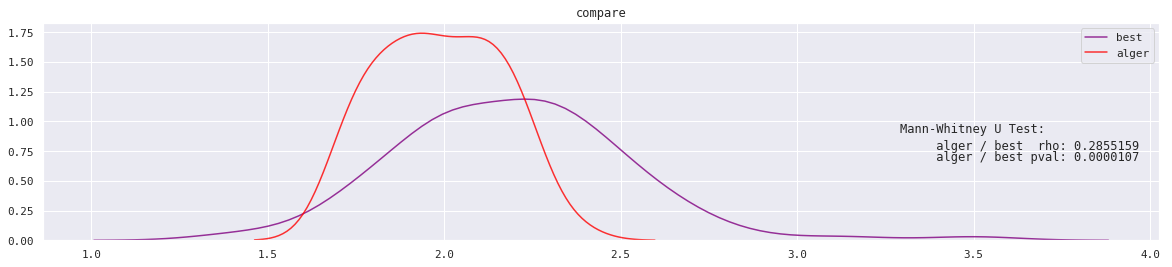

<Figure size 432x288 with 0 Axes>

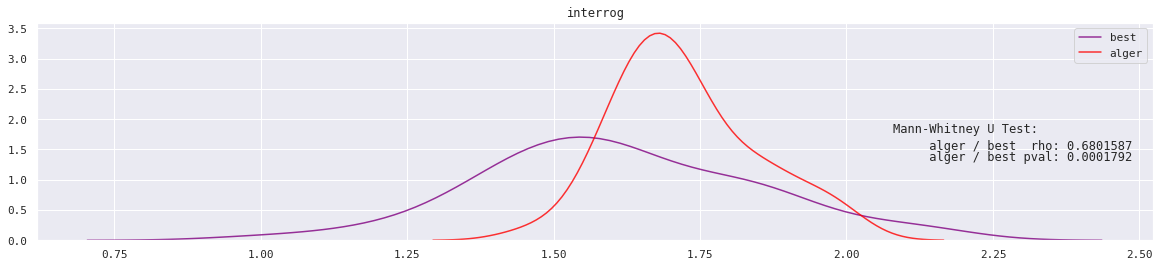

<Figure size 432x288 with 0 Axes>

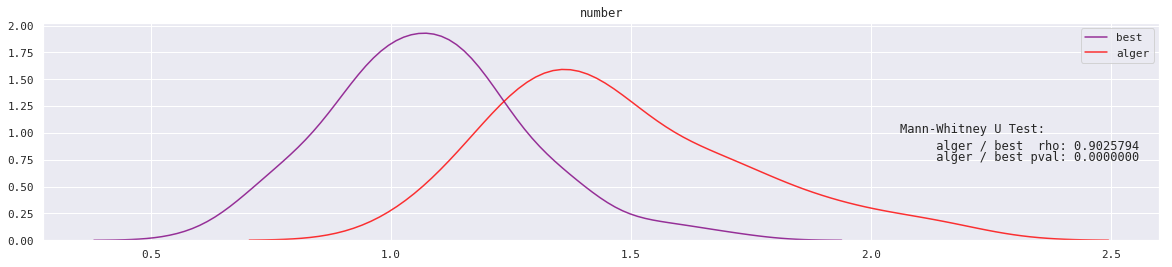

<Figure size 432x288 with 0 Axes>

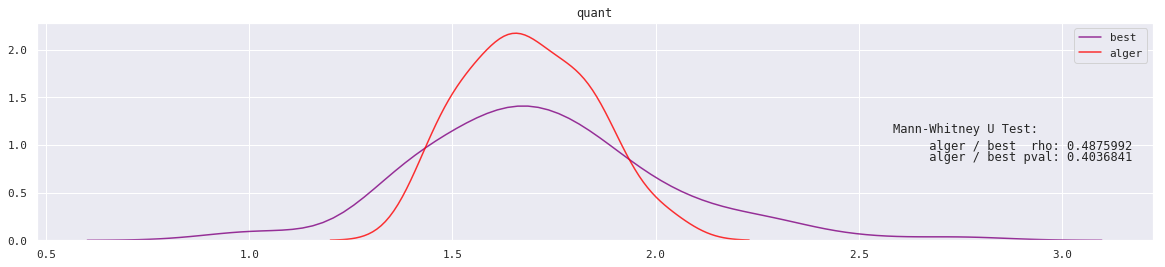

<Figure size 432x288 with 0 Axes>

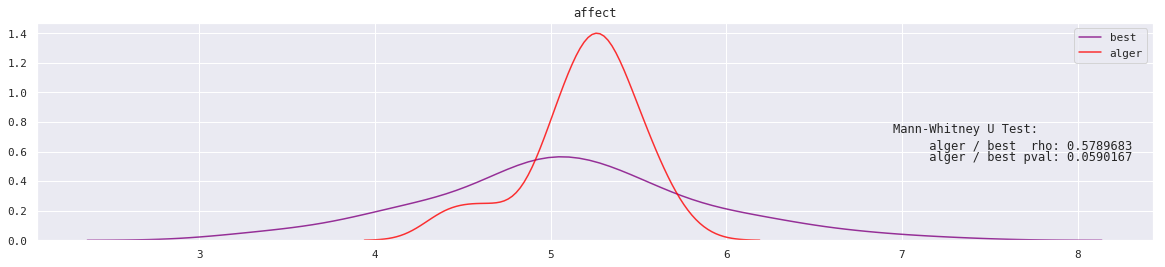

<Figure size 432x288 with 0 Axes>

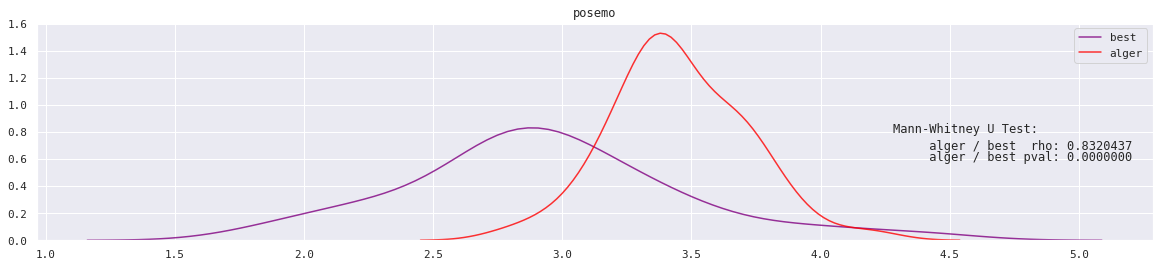

<Figure size 432x288 with 0 Axes>

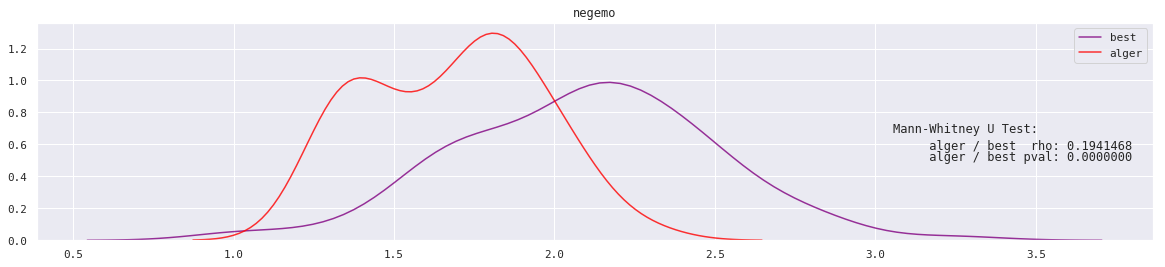

<Figure size 432x288 with 0 Axes>

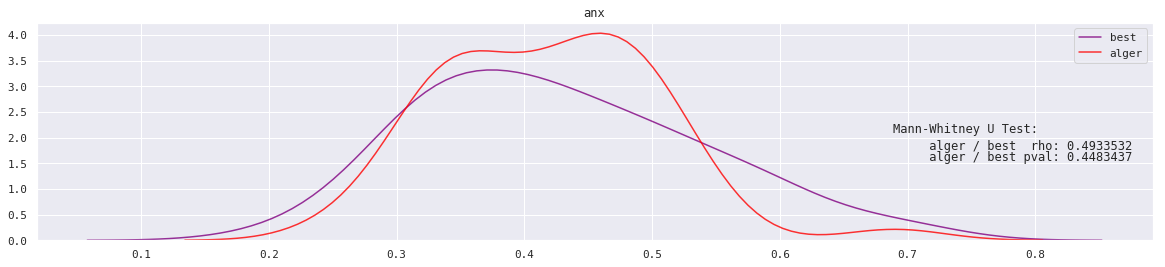

<Figure size 432x288 with 0 Axes>

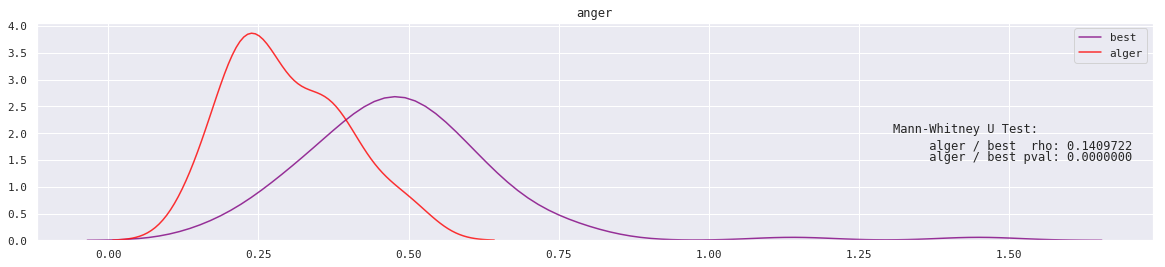

<Figure size 432x288 with 0 Axes>

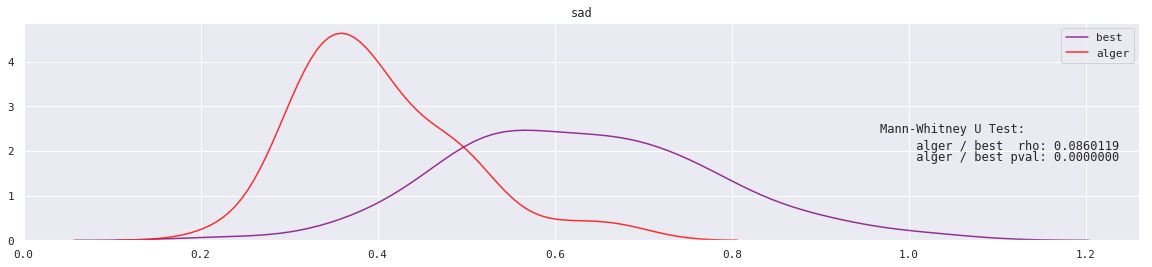

<Figure size 432x288 with 0 Axes>

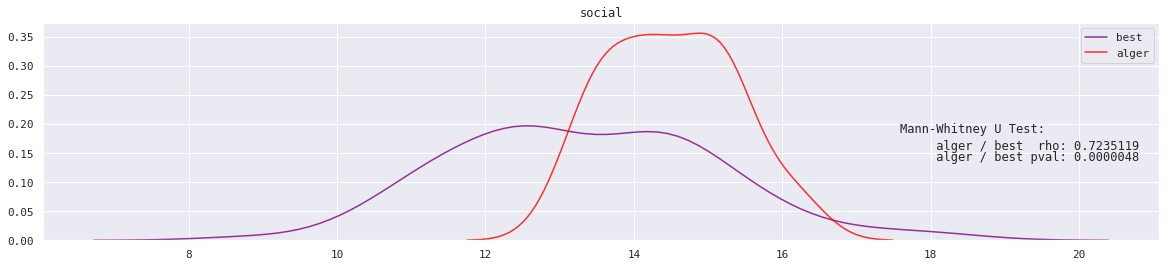

<Figure size 432x288 with 0 Axes>

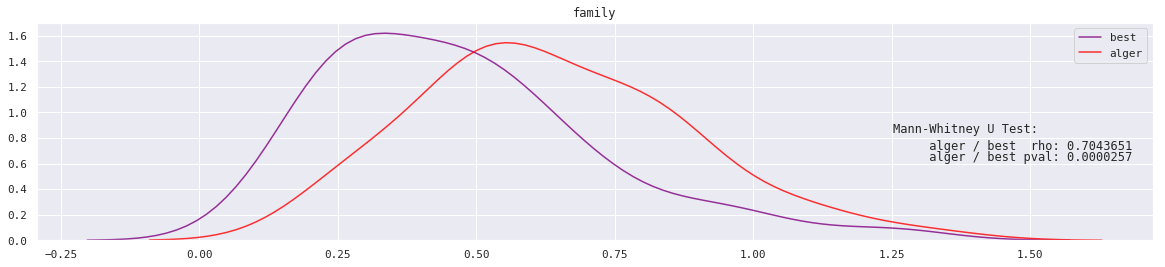

<Figure size 432x288 with 0 Axes>

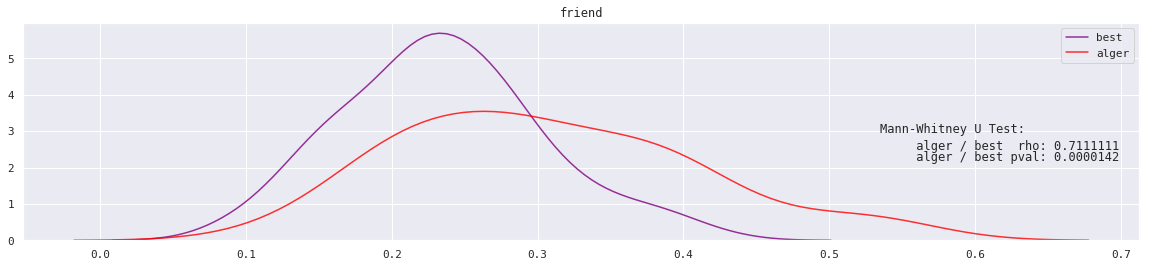

<Figure size 432x288 with 0 Axes>

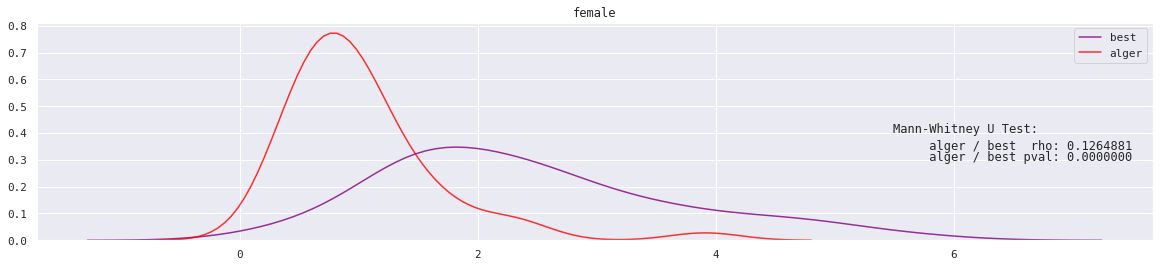

<Figure size 432x288 with 0 Axes>

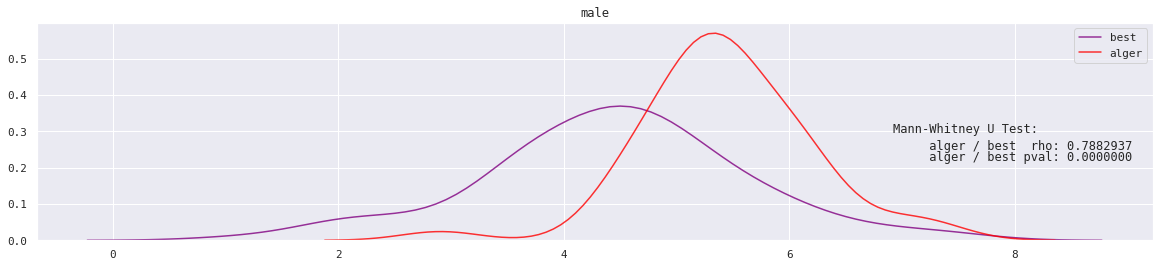

<Figure size 432x288 with 0 Axes>

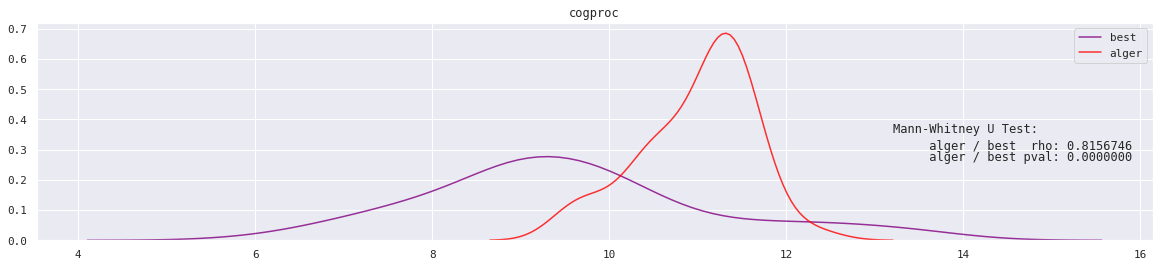

<Figure size 432x288 with 0 Axes>

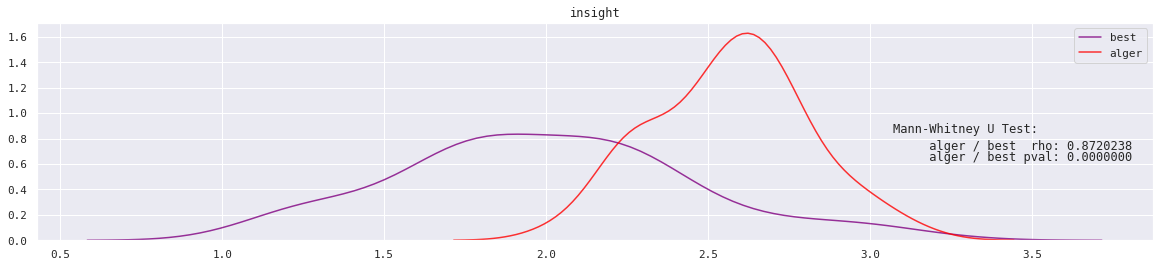

<Figure size 432x288 with 0 Axes>

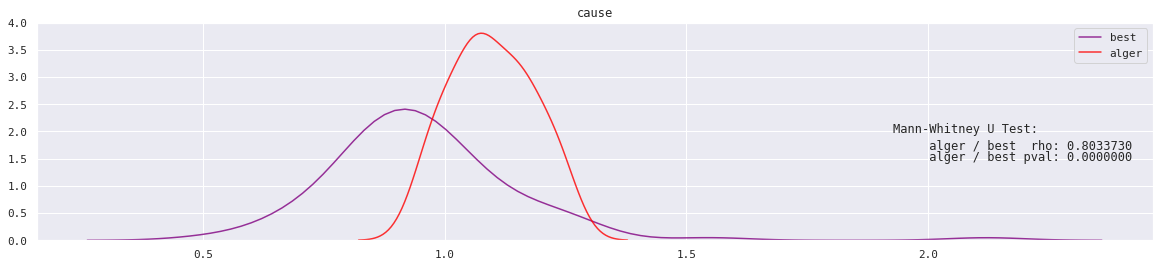

<Figure size 432x288 with 0 Axes>

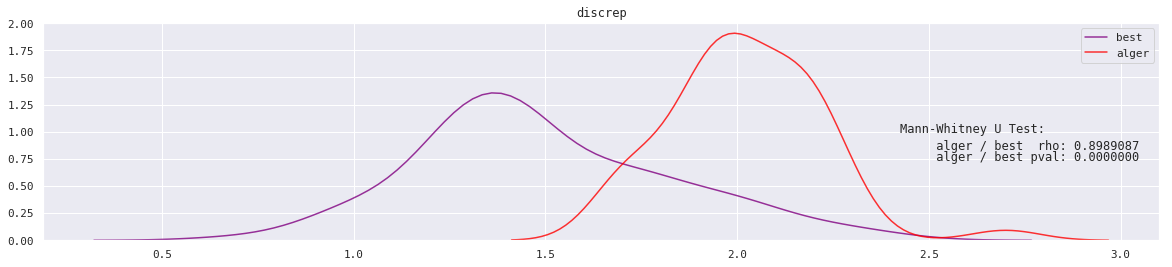

<Figure size 432x288 with 0 Axes>

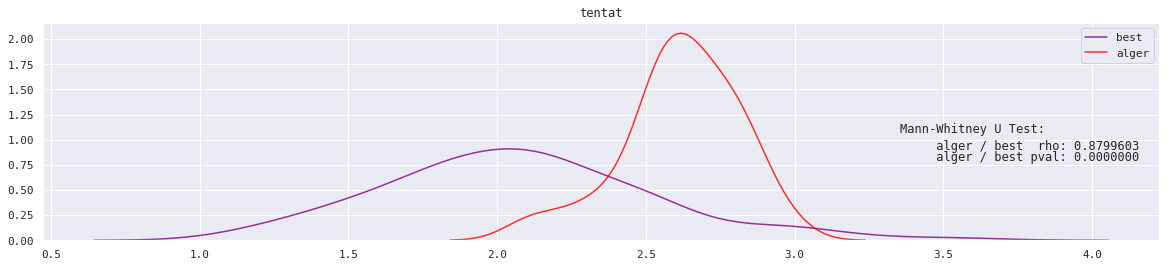

<Figure size 432x288 with 0 Axes>

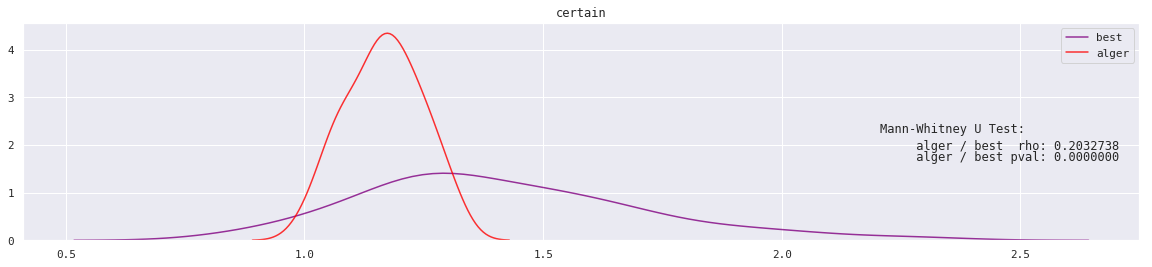

<Figure size 432x288 with 0 Axes>

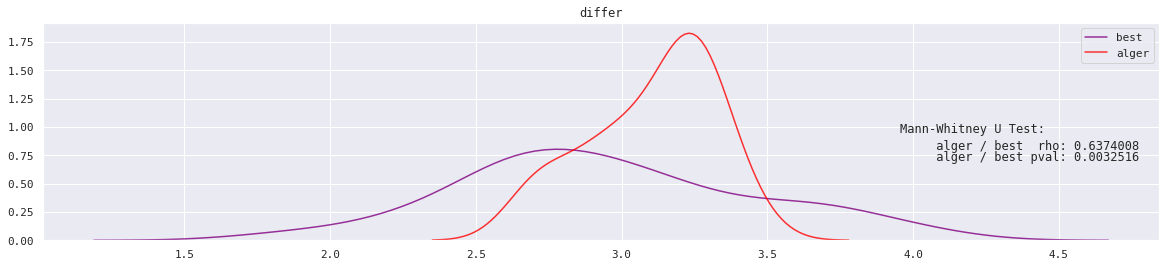

<Figure size 432x288 with 0 Axes>

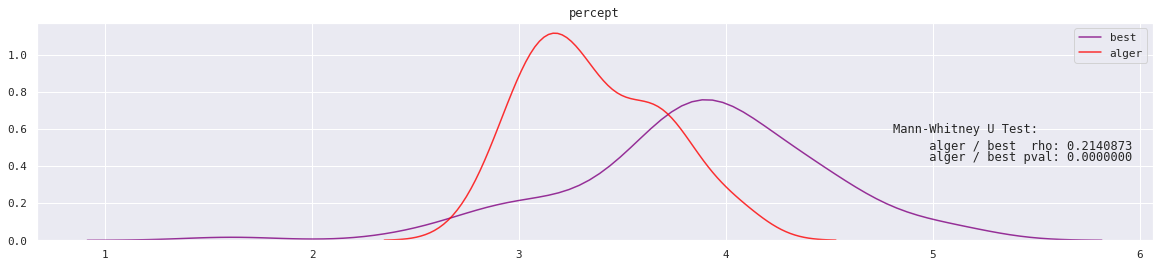

<Figure size 432x288 with 0 Axes>

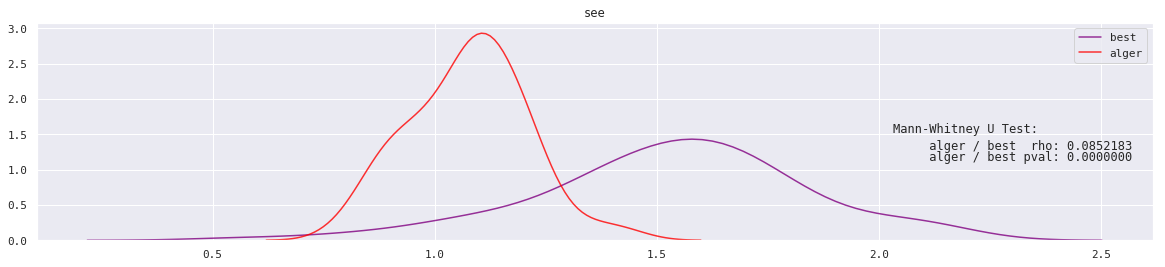

<Figure size 432x288 with 0 Axes>

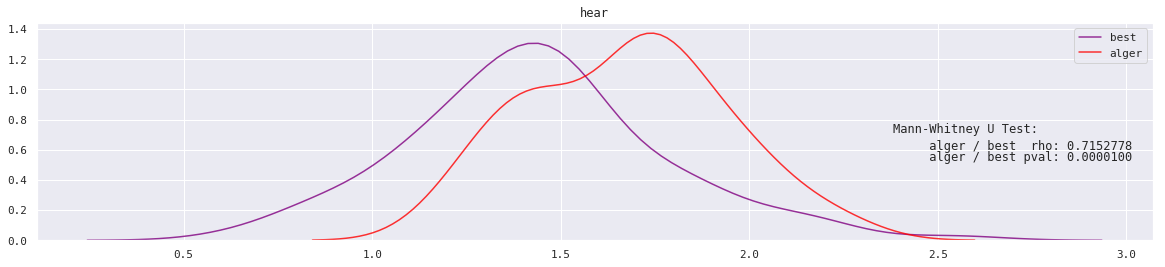

<Figure size 432x288 with 0 Axes>

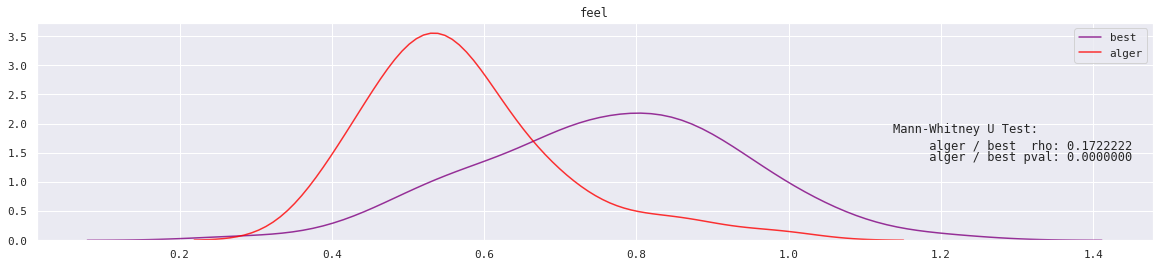

<Figure size 432x288 with 0 Axes>

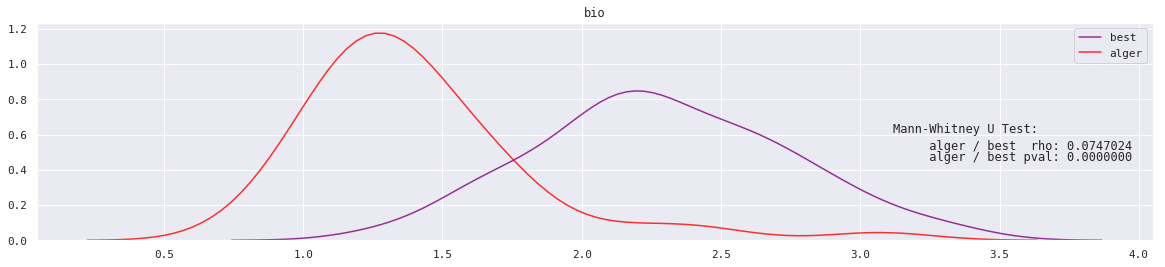

<Figure size 432x288 with 0 Axes>

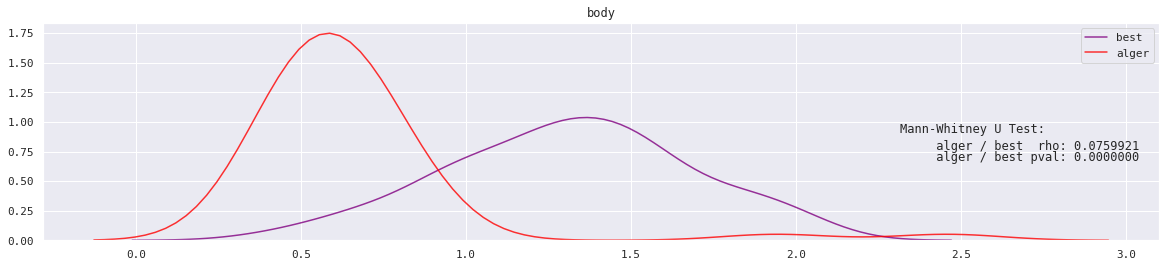

<Figure size 432x288 with 0 Axes>

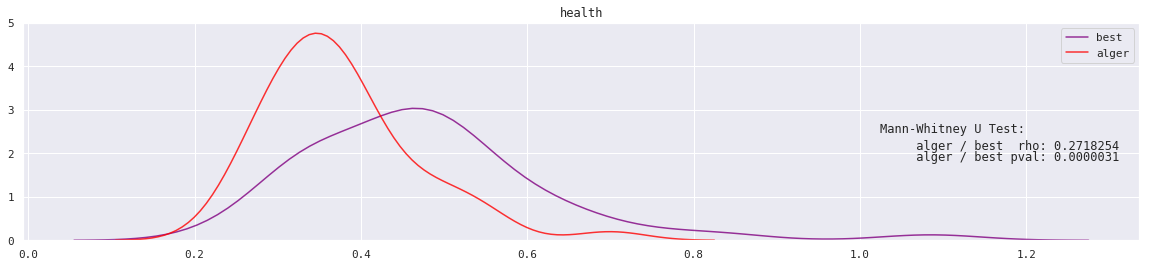

<Figure size 432x288 with 0 Axes>

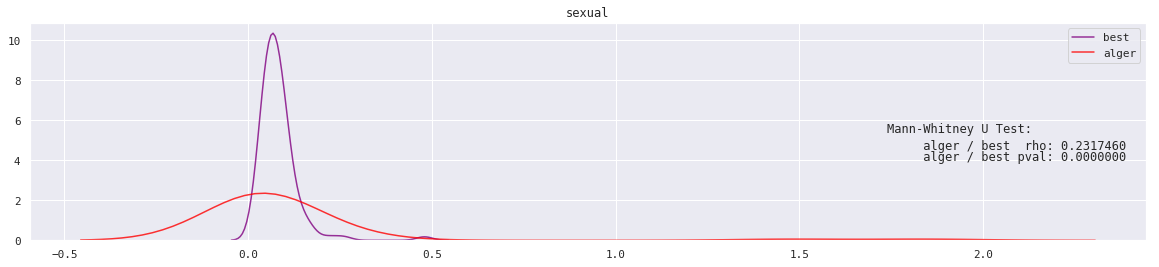

<Figure size 432x288 with 0 Axes>

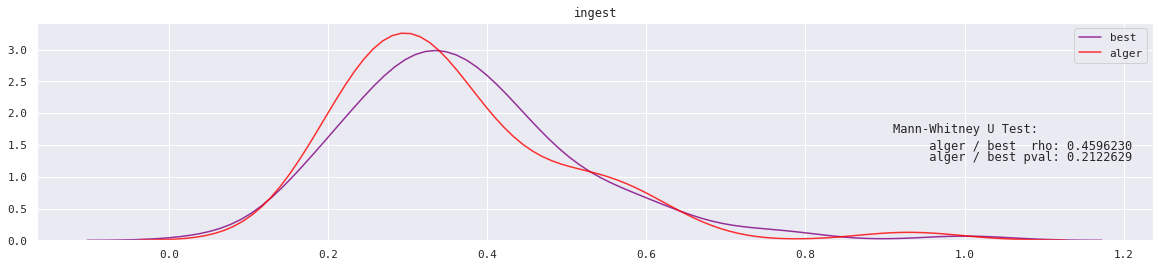

<Figure size 432x288 with 0 Axes>

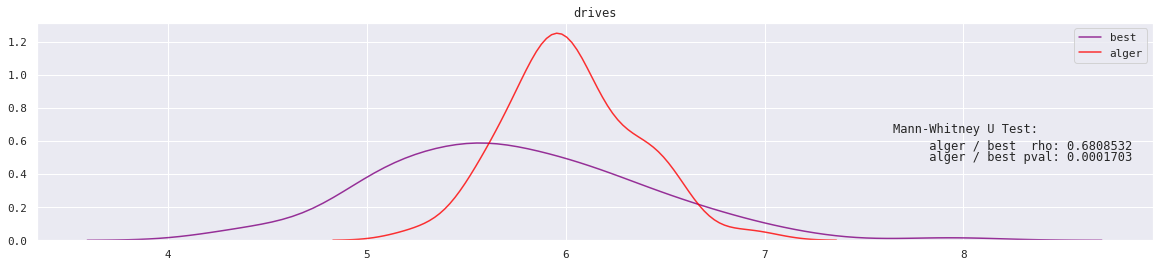

<Figure size 432x288 with 0 Axes>

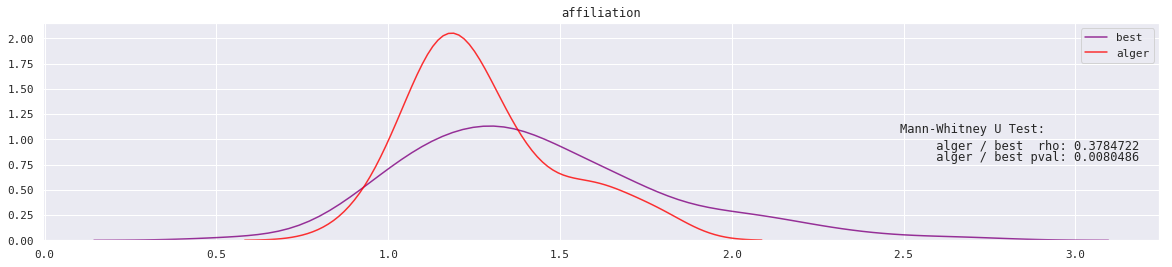

<Figure size 432x288 with 0 Axes>

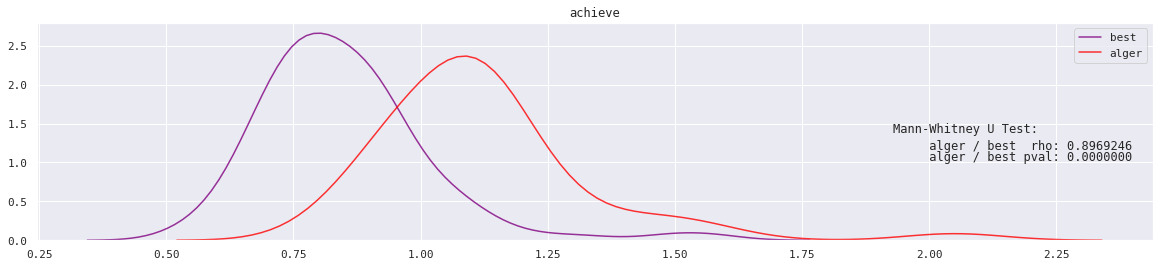

<Figure size 432x288 with 0 Axes>

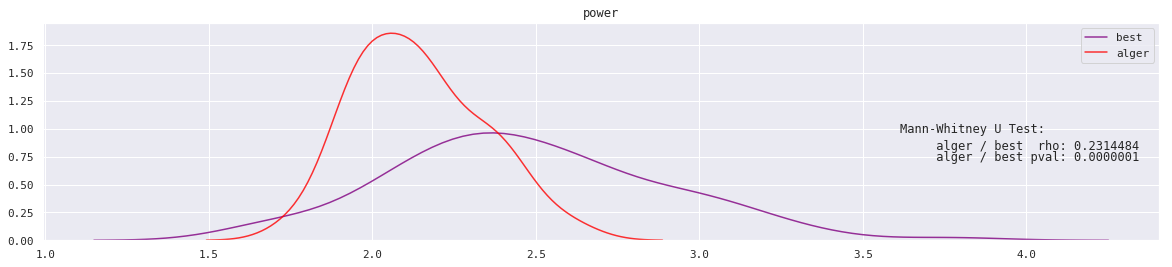

<Figure size 432x288 with 0 Axes>

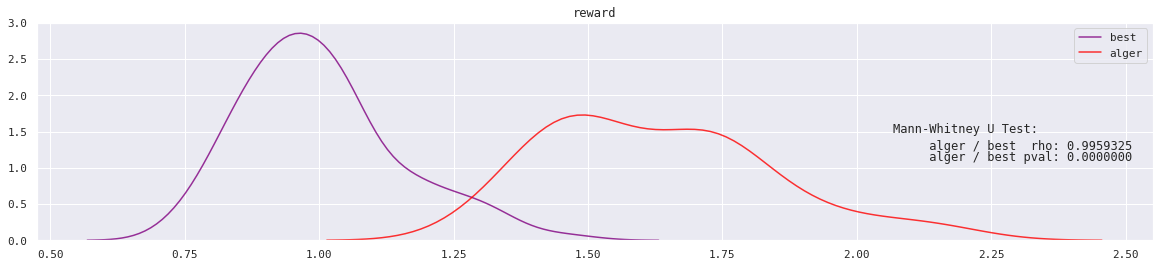

<Figure size 432x288 with 0 Axes>

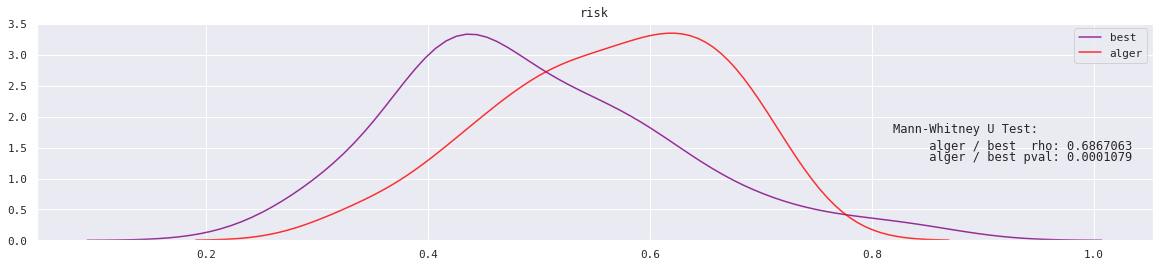

<Figure size 432x288 with 0 Axes>

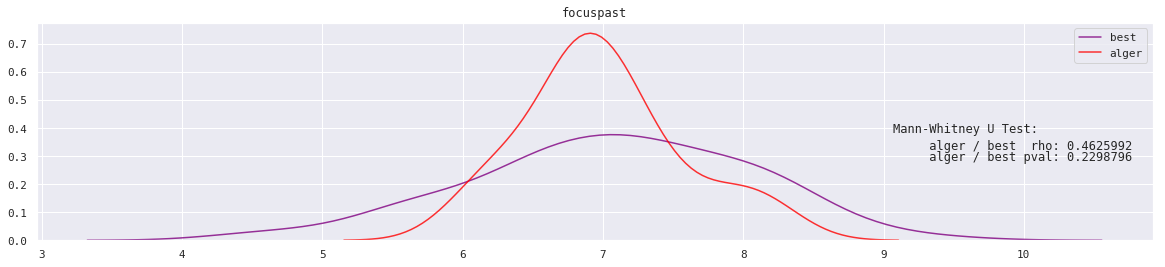

<Figure size 432x288 with 0 Axes>

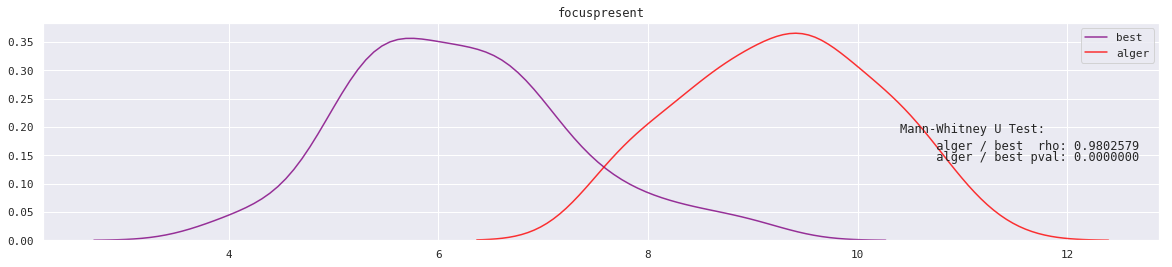

<Figure size 432x288 with 0 Axes>

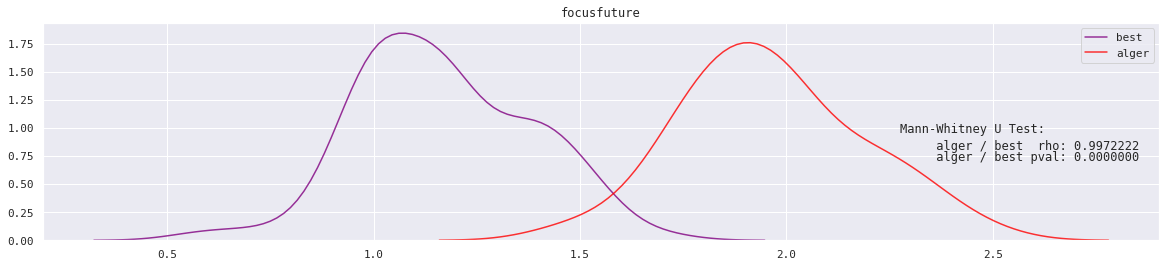

<Figure size 432x288 with 0 Axes>

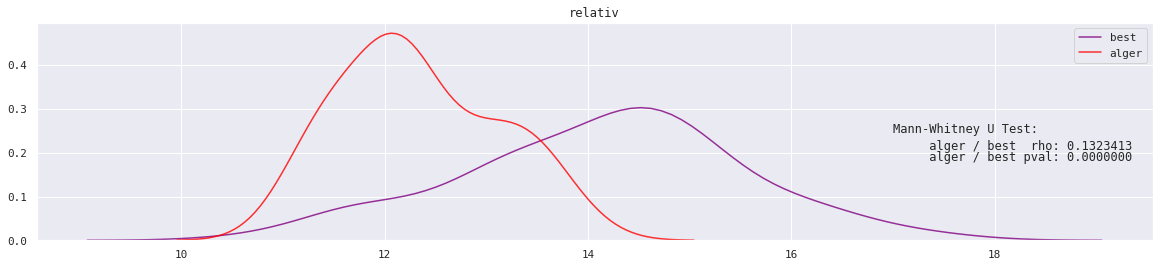

<Figure size 432x288 with 0 Axes>

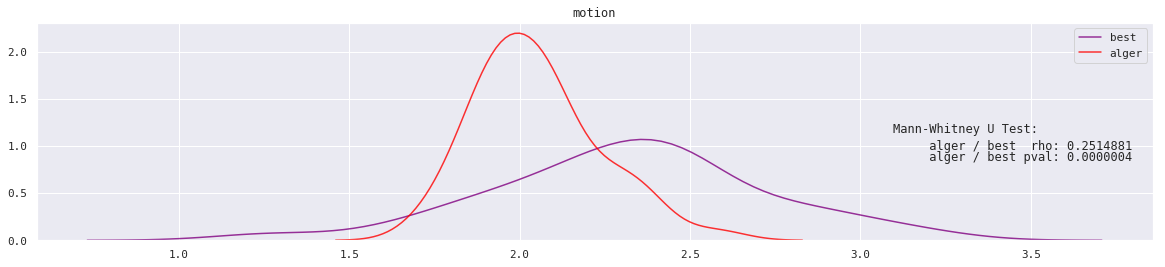

<Figure size 432x288 with 0 Axes>

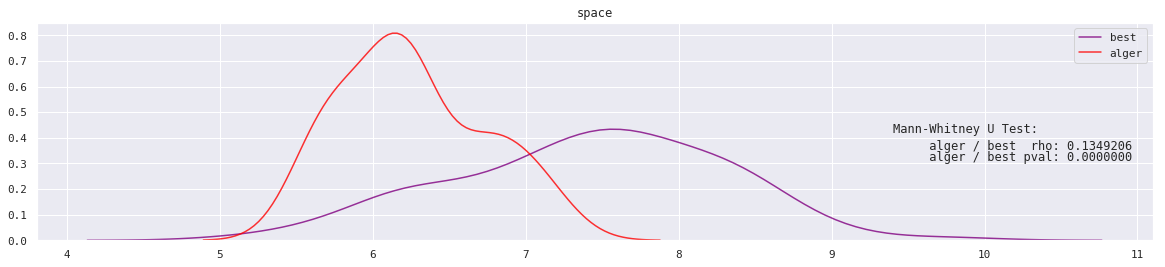

<Figure size 432x288 with 0 Axes>

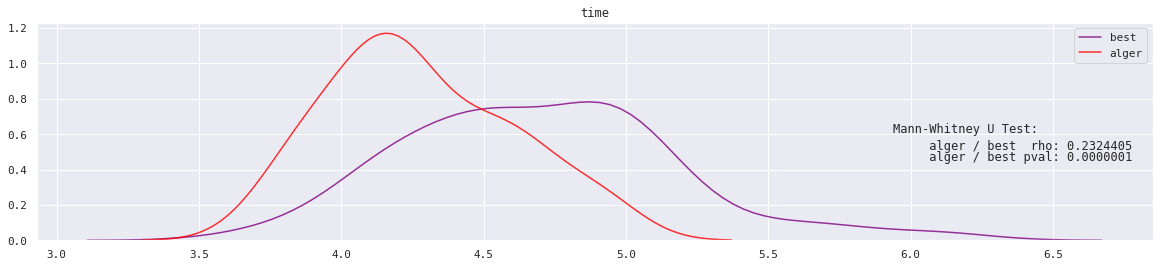

<Figure size 432x288 with 0 Axes>

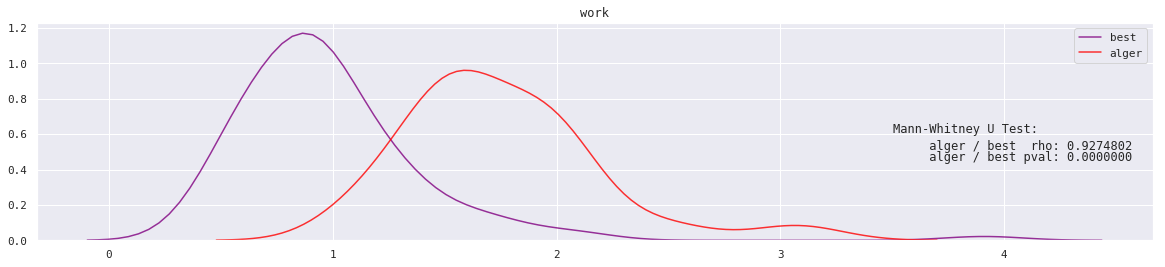

<Figure size 432x288 with 0 Axes>

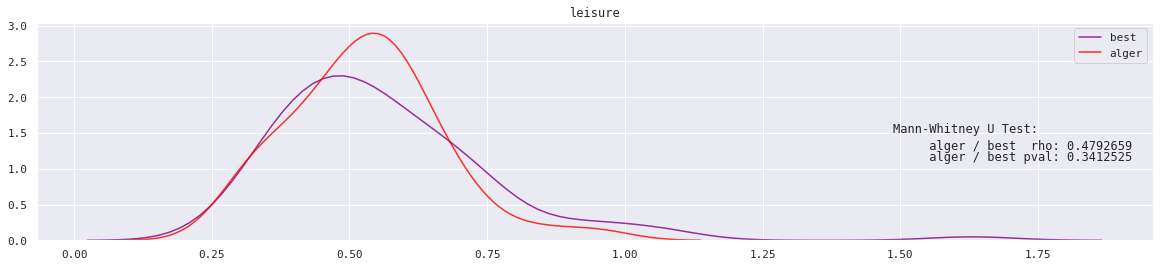

<Figure size 432x288 with 0 Axes>

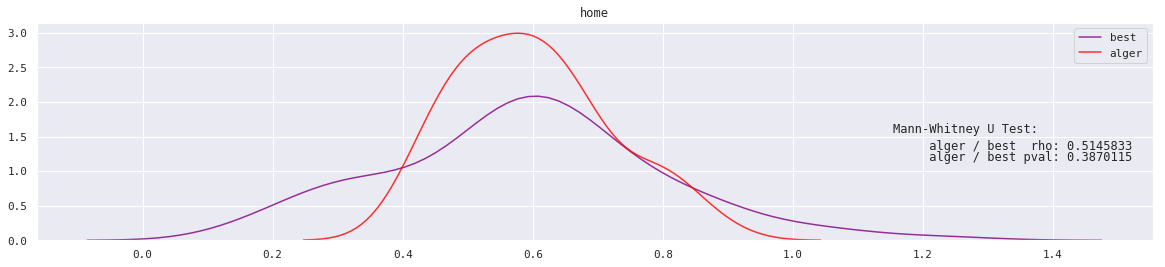

<Figure size 432x288 with 0 Axes>

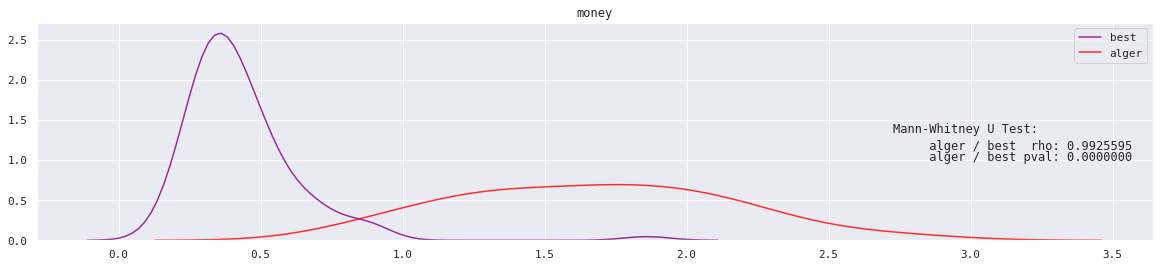

<Figure size 432x288 with 0 Axes>

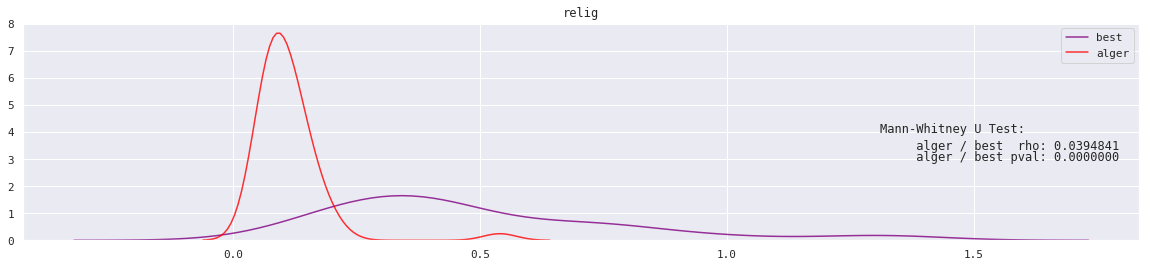

<Figure size 432x288 with 0 Axes>

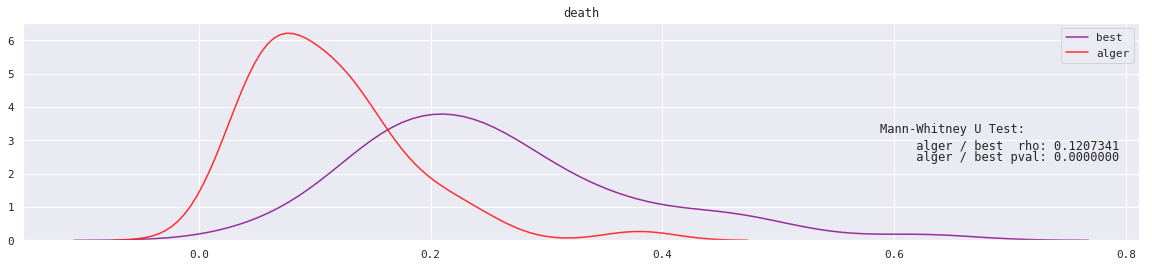

<Figure size 432x288 with 0 Axes>

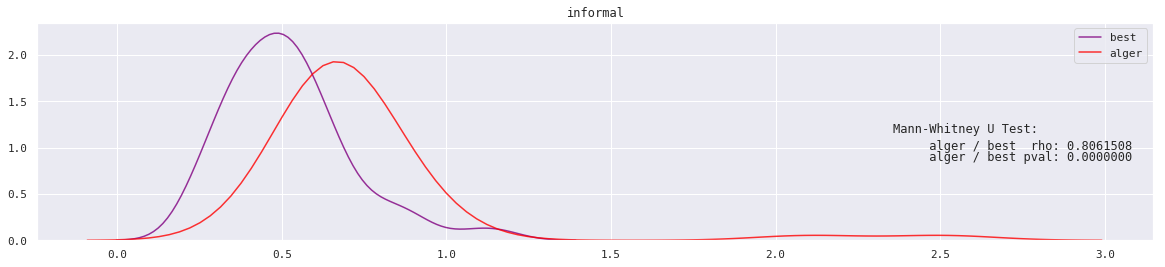

<Figure size 432x288 with 0 Axes>

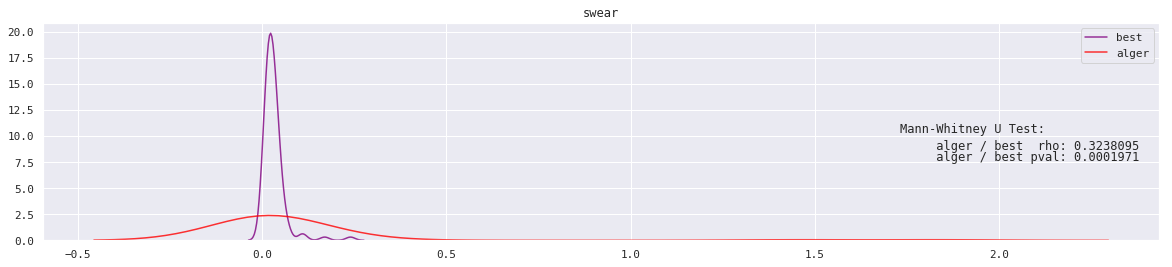

<Figure size 432x288 with 0 Axes>

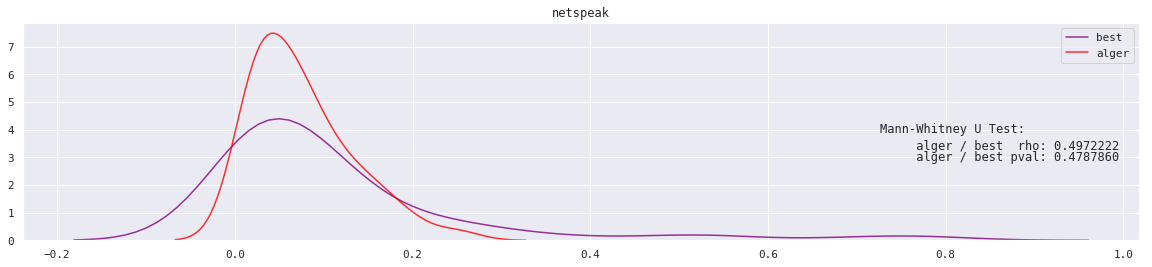

<Figure size 432x288 with 0 Axes>

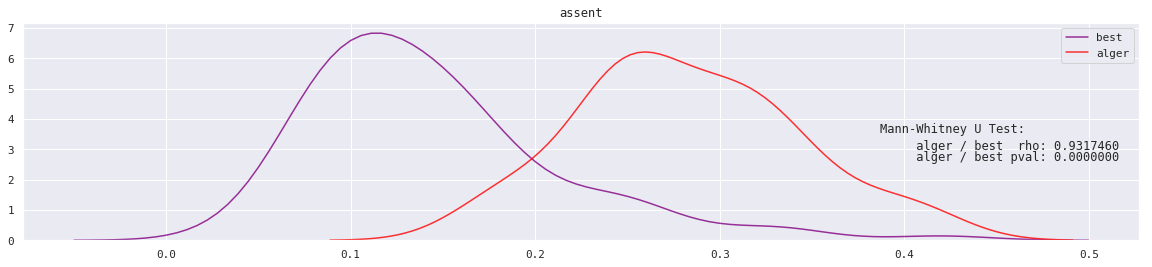

<Figure size 432x288 with 0 Axes>

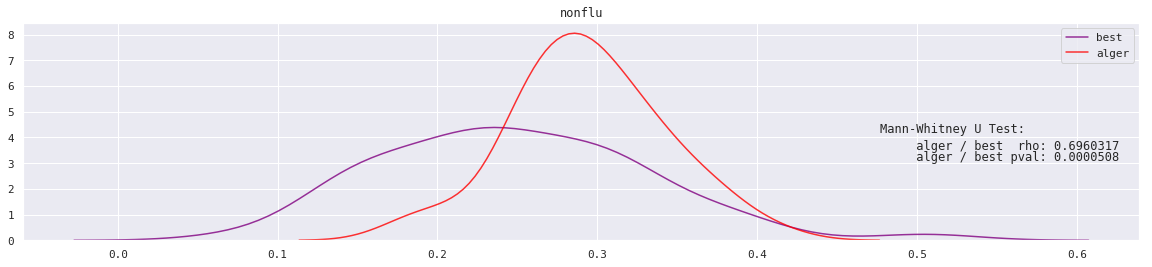

<Figure size 432x288 with 0 Axes>

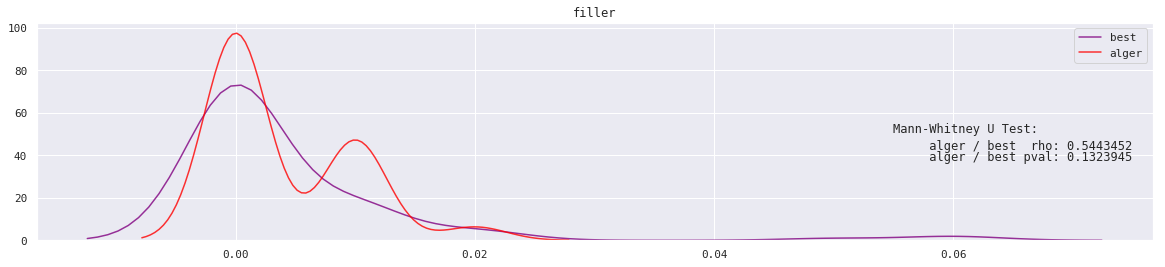

<Figure size 432x288 with 0 Axes>

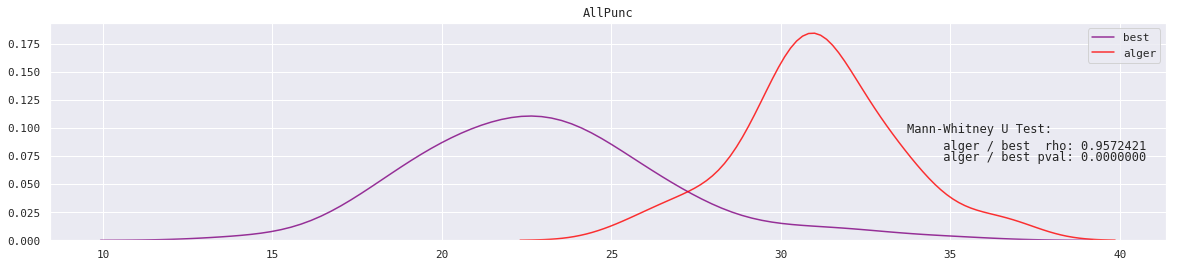

<Figure size 432x288 with 0 Axes>

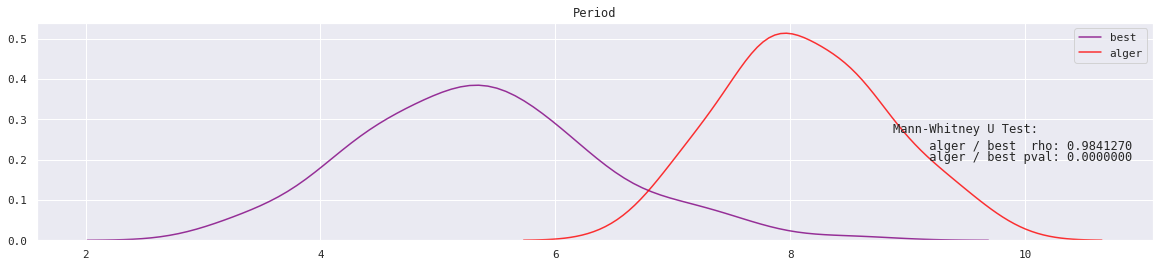

<Figure size 432x288 with 0 Axes>

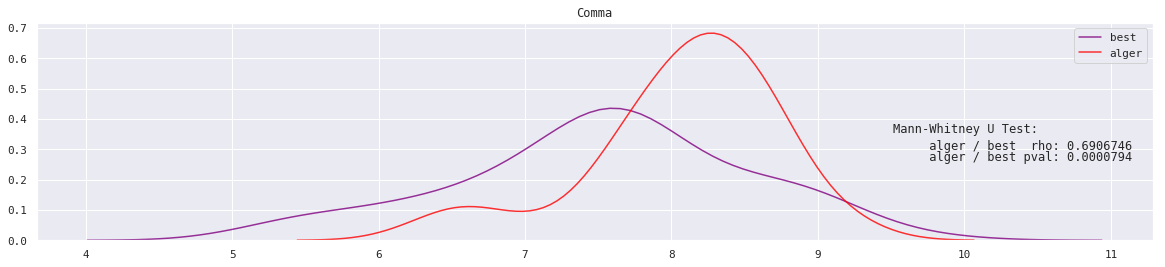

<Figure size 432x288 with 0 Axes>

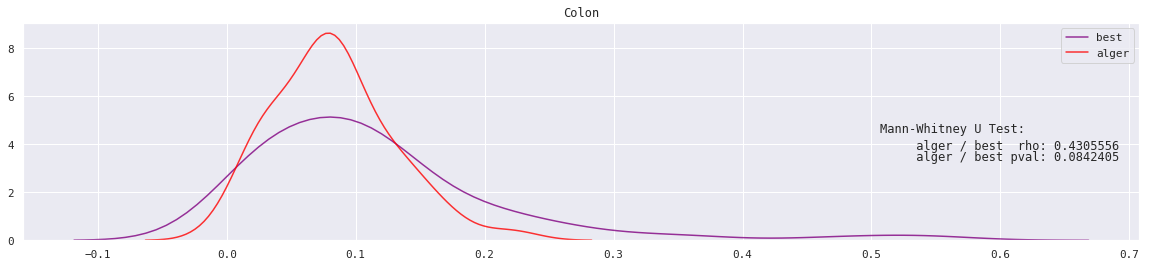

<Figure size 432x288 with 0 Axes>

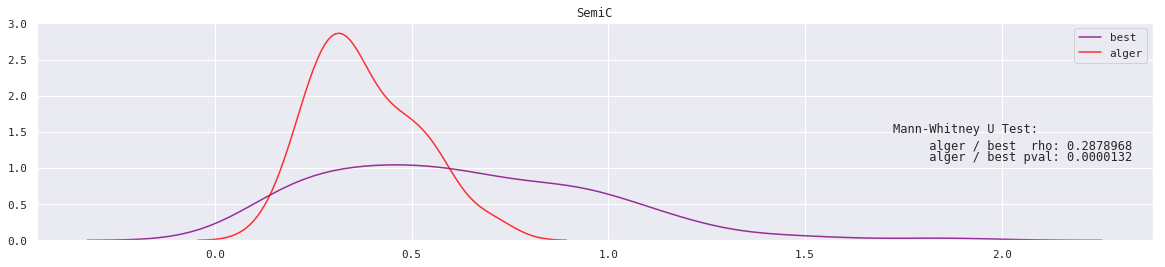

<Figure size 432x288 with 0 Axes>

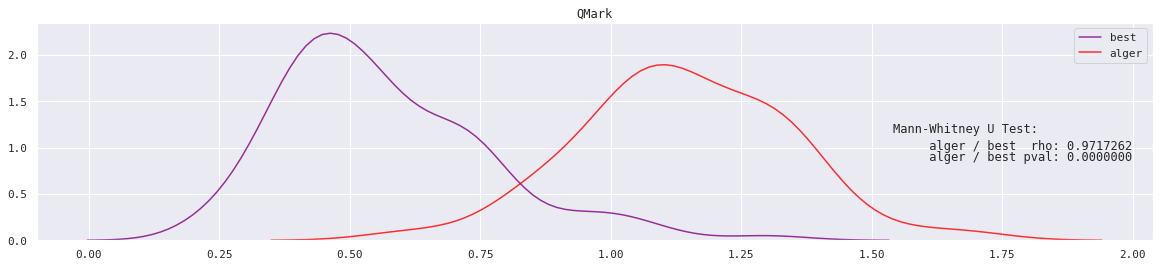

<Figure size 432x288 with 0 Axes>

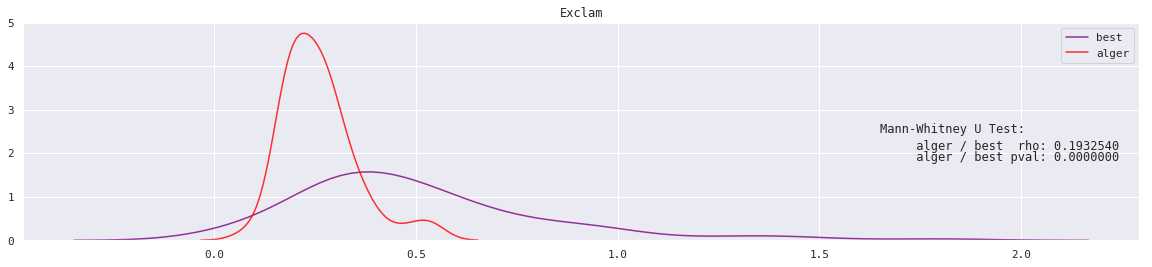

<Figure size 432x288 with 0 Axes>

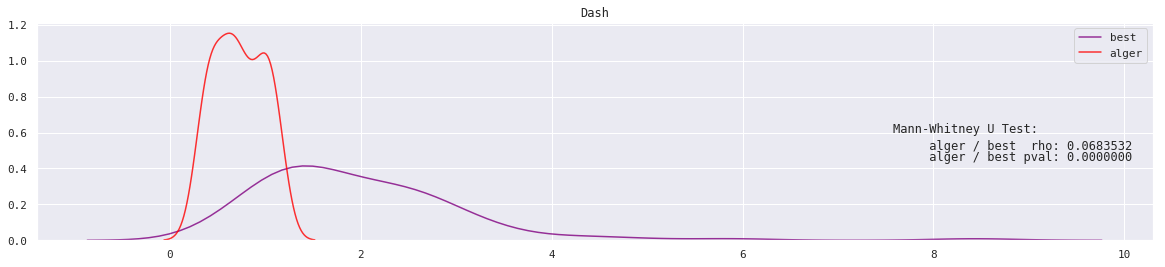

<Figure size 432x288 with 0 Axes>

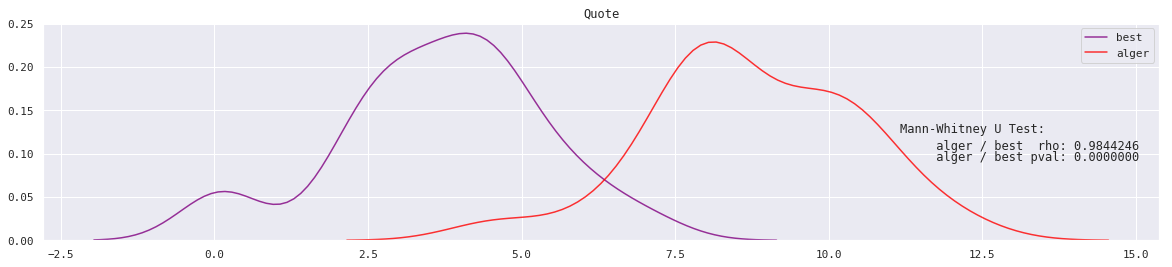

<Figure size 432x288 with 0 Axes>

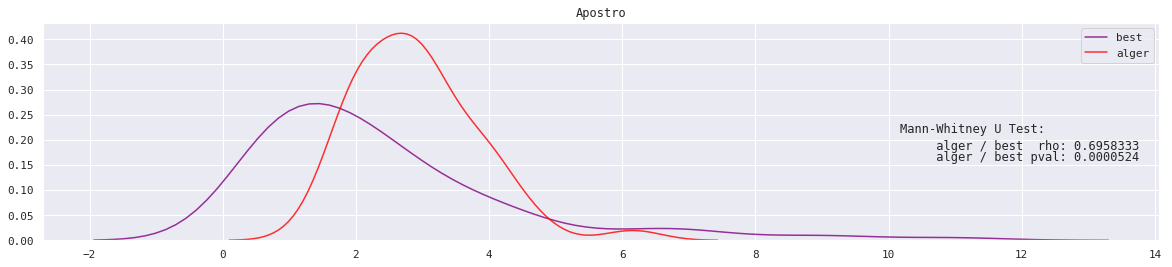

<Figure size 432x288 with 0 Axes>

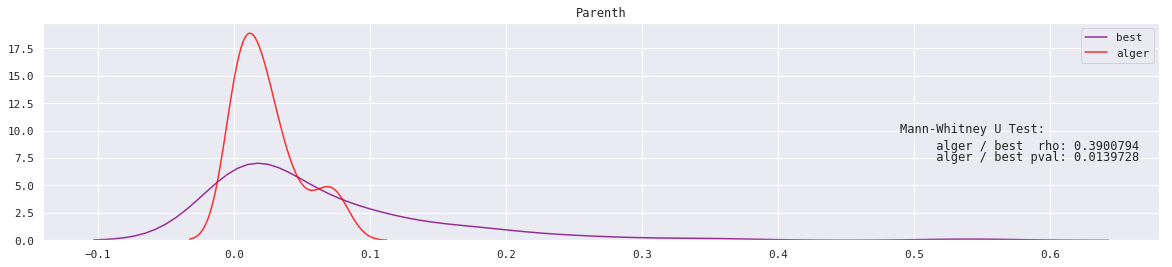

<Figure size 432x288 with 0 Axes>

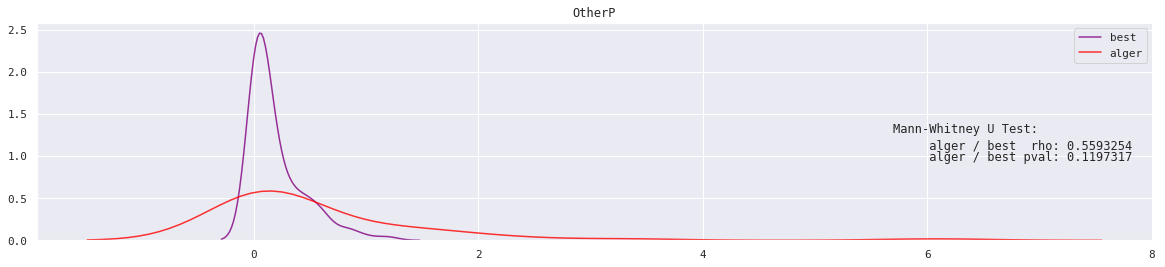

In [51]:
# GRAPH EVERY FEATURE

for col in best.columns[2:]:
    tmp = plotter(col, bw="scott")
    sns.set(font="monospace")
    tmp.text(0.72, 0.5 , "Mann-Whitney U Test:")
    tmp.text(0.72, 0.44, "     alger / best  rho: {0:0.7f}".format(mwu.ix[col]['algerbest_rho']))
    tmp.text(0.72, 0.4 , "     alger / best pval: {0:0.7f}".format(mwu.ix[col]['algerbest_pval']))
    tmp = plt.figure()
plt.close()